2019年  4月 24日 水曜日 14:32:40 JST
Running with PyMC3 version v.3.6
3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]

Total number of epicurves: 82
report
WHO_AFRO    (34,)
WHO_DON     (33,)
WHO_OEW     (15,)
Name: report, dtype: object


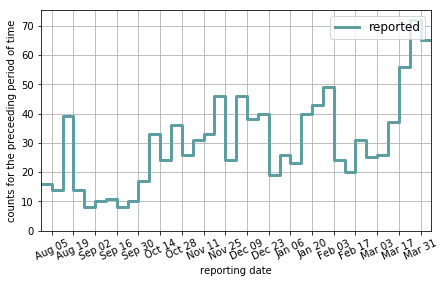

In [1]:
%run ./Initialization.ipynb

In [2]:
set_plot_style(usetex=True)

In [3]:
# Vector of all epicurves
epicurves = pd.unique(Df.epicurve)
epicurves[-5:]

array(['2018-09-02T00:00:00.000000000', '2018-08-29T00:00:00.000000000',
       '2018-08-26T00:00:00.000000000', '2018-08-22T00:00:00.000000000',
       '2018-08-20T00:00:00.000000000'], dtype='datetime64[ns]')

# <font color="orange">Figure 1AB</font>

First we start with general-purpose figure

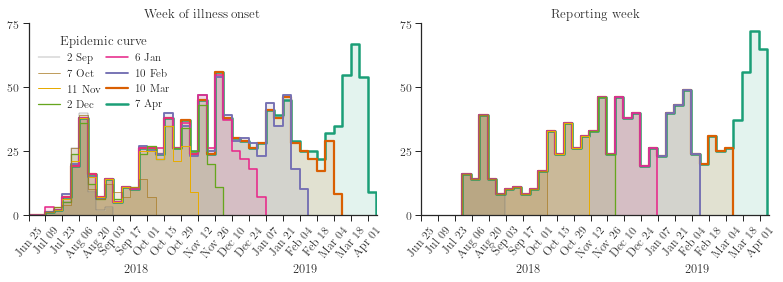

In [4]:
fig, axs = plt.subplots(1,2,sharey=False)
fig.set_size_inches(11.1,4.25); 
epicurves_clrs = sns.color_palette("Dark2", len(epicurves_to_show))

ymx = 75
dts = df_MOH_reported.date.get_values()
dts = np.r_[dts[:1]-np.timedelta64(1,'W'),dts]
confirmed_reported = np.r_[df_MOH_reported.confirmed[:1],df_MOH_reported.confirmed]
total_reported = confirmed_reported+np.r_[df_MOH_reported.probable[:1],df_MOH_reported.probable]

alpha_background = 0.12
incr_lwd = lambda idx: 2.5-idx*.3
decr_lwd = lambda idx: 1.0+idx*.3
for idx, snapshot in enumerate(epicurves_to_show[::-1]):
    df0 = Df.loc[Df.epicurve==snapshot].copy()
    dts0 = df0.date.values
    dts0 = np.r_[dts0[:1],dts0,dts0[-1:]+np.timedelta64(1,'W'),dts0[-1:]+np.timedelta64(1,'W')]
    confirmed = np.r_[0,df0.confirmed.values,0,0]
    axs[0].step(dts0,confirmed,lw=incr_lwd(idx),where='post',c=epicurves_clrs[idx],
                label=snapshot.strftime('/%d %b').replace("/0", "/").replace("/",""))
    axs[0].fill_between(dts0,confirmed,step='post',facecolor=epicurves_clrs[idx],
                        alpha=alpha_background,label="__nolegend__")
    dts1 = dts[(snapshot-pd.to_datetime(dts)).astype('timedelta64[D]').astype('int')>=0]
    dts1 = np.r_[dts1[:1],dts1,dts1[-1:]]
    confirmed_reported1 = confirmed_reported[(snapshot-pd.to_datetime(dts)).astype('timedelta64[D]').astype('int')>=0]
    confirmed_reported1 = np.r_[0,confirmed_reported1,0]
    axs[1].step(dts1,confirmed_reported1,lw=incr_lwd(idx),where='pre',c=epicurves_clrs[idx]);
    axs[1].fill_between(dts1,confirmed_reported1,step='pre',alpha=alpha_background,facecolor=epicurves_clrs[idx])


ymargin = .5
xmin = min(Df[Df.confirmed>0].date)
xmax = max(Df.date)+np.timedelta64(1,'W')
xtks = pd.date_range(start=xmin,end=xmax,freq='1D')[::14]
for idx, ax in enumerate(axs):
    ax.set_xticks(xtks)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax.set_title("Reporting week" if idx else "Week of illness onset");
    ax.set_xlim(xmin,xmax+np.timedelta64(12,'h'))
    ax.set_ylim(0,ymx)
    ax.set_yticks(np.arange(0,ymx+25,25))
    fig.autofmt_xdate(rotation=50,ha='center')
    ax.annotate('2019', (0,0), (264, -47), xycoords='axes fraction', 
                textcoords='offset points', va='top', fontsize=12.5)
    ax.annotate('2018', (0,0), (95, -47), xycoords='axes fraction', 
                textcoords='offset points', va='top', fontsize=12.5)
    ax.xaxis.labelpad = 16
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# to reverse the order in the legend
handles, labels = axs[0].get_legend_handles_labels()
order = np.arange(len(handles))[::-1]
axs[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           #fontsize=12, 
           loc=2, ncol=2, title="Epidemic curve", frameon=False, prop={'size': 11},
           columnspacing=0.5,handletextpad=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../figures/draft/Fig1ab.pdf",format='pdf',bbox_inches='tight')

# <font color="orange">Figure 1cd</font>

**No change point**

In [5]:
# Separate the dataframe on two: excluding the latest epicurve (df) and the latest epicurve (df0)
epicurve0 = epicurves[0] 
print(epicurve0)
df, df0 = make_df_and_df0(Df, epicurve0)
[display(x[:5]) for x in [df,df0]];

2019-04-07T00:00:00.000000000


,date,epicurve,T,t,confirmed,probable,epicurve0,T0,confirmed0,probable0,δt,δt0,logδt,logδt0,total
0,2018-04-30,2018-08-20,113,0,0,1,2019-04-07,343,0,2,113,343,4.727388,5.837730,NaN
1,2018-05-07,2018-08-20,113,7,0,0,2019-04-07,343,0,0,106,336,4.663439,5.817111,NaN
2,2018-05-14,2018-08-20,113,14,0,1,2019-04-07,343,0,0,99,329,4.595120,5.796058,NaN
3,2018-05-21,2018-08-20,113,21,0,3,2019-04-07,343,0,2,92,322,4.521789,5.774552,NaN
4,2018-05-28,2018-08-20,113,28,0,1,2019-04-07,343,0,0,85,315,4.442651,5.752573,NaN


,date,epicurve,confirmed,probable,t,T,δt,logδt,total
0,2018-04-30,2019-04-07,0,2,0,343,343,5.837730,2
1,2018-05-07,2019-04-07,0,0,7,343,336,5.817111,0
2,2018-05-14,2019-04-07,0,0,14,343,329,5.796058,0
3,2018-05-21,2019-04-07,0,2,21,343,322,5.774552,2
4,2018-05-28,2019-04-07,0,0,28,343,315,5.752573,0


In [6]:
with pm.Model() as model:
    # should be flat priors, 
    # where testval are initial conditions for optim-function
    delaymean = pm.Flat('delaymean', testval=12.)
    k = pm.Flat('k', testval=2.75)
    logθ = tt.log(delaymean/tt.gamma(1+1/k))

    μ = df['confirmed'].values*(1-tt.exp(-tt.exp(k*(df['logδt0'].values-logθ))))/\
                                 (1-tt.exp(-tt.exp(k*(df['logδt'].values-logθ))))
    pm.Poisson('confirmed0_likelihood', μ+0.001, observed=df['confirmed0'].values)
    
    loglks = tt.switch(tt.eq(μ,0), 0, df['confirmed0'].values*tt.log(μ)-μ-tt.gammaln(df['confirmed0'].values+1))
    loglk = pm.Deterministic('loglk',loglks.sum())
    pm.Deterministic('AIC',2*(2-loglk))
    
    vorder = [model[v.var] for v in model.bijection.ordering.vmap]
    solMLE = pm.find_MAP()
    hess = pm.find_hessian(solMLE,vars=vorder)
    cov =  np.linalg.inv(hess)
    
solMLE

logp = -13,526, ||grad|| = 0.0091046: 100%|██████████| 13/13 [00:00<00:00, 265.81it/s]  


{'delaymean': array(11.67113401),
 'k': array(1.72550433),
 'loglk': array(-4816.4094542),
 'AIC': array(9636.81890839)}

In [7]:
solMLE_dictForm = model.dict_to_array(solMLE)
solMLE_dictForm

array([ 1.72550433, 11.67113401])

In [8]:
# Hessian
hess

array([[2257.14629524,  227.21769309],
       [ 227.21769309,   58.24159085]])

In [9]:
# Covariance matrix
cov

array([[ 0.00072955, -0.0028462 ],
       [-0.0028462 ,  0.02827374]])

In [10]:
# Standard deviation
sqrt(np.diag(cov))

array([0.02701023, 0.16814796])

In [11]:
with pm.Model() as model_sampling:
    pars = pm.MvNormal('pars', mu=model.dict_to_array(solMLE), 
                       cov=np.diagflat(np.diag(cov)), shape=2)
    delaymean = pm.Deterministic('delaymean',pars[-1])
    k = pm.Deterministic('k',pars[0])
    θ = pm.Deterministic('θ',delaymean/tt.gamma(1+1/k))
    delaysd = pm.Deterministic('delaysd',θ*tt.sqrt(tt.gamma(1+2/k)-tt.gamma(1+1/k)**2))
    
    sampling_Fig1cd = pm.sample_prior_predictive(10000,random_seed=20180723)
    
sampling_Fig1cd

{'delaymean': array([11.62500301, 11.67569072, 12.06454985, ..., 11.52493469,
        11.82818041, 11.51058783]),
 'delaysd': array([7.18845138, 7.02938391, 7.10932874, ..., 6.7483394 , 7.039393  ,
        6.91246627]),
 'k': array([1.66114687, 1.71064323, 1.75153112, ..., 1.76384048, 1.73253197,
        1.71541262]),
 'θ': array([13.00712087, 13.09122825, 13.54695528, ..., 12.94614356,
        13.27293563, 12.9084585 ]),
 'pars': array([[ 1.66114687, 11.62500301],
        [ 1.71064323, 11.67569072],
        [ 1.75153112, 12.06454985],
        ...,
        [ 1.76384048, 11.52493469],
        [ 1.73253197, 11.82818041],
        [ 1.71541262, 11.51058783]])}

In [12]:
delaymean_p = ss.scoreatpercentile(sampling_Fig1cd['delaymean'],[50,2.5,97.5],axis=0)
delaysd_p = ss.scoreatpercentile(sampling_Fig1cd['delaysd'],[50,2.5,97.5],axis=0)
df_Fig1cd = pd.DataFrame({'delaymean': delaymean_p, 'delaysd': delaysd_p}, 
             index=['median','p2.5','p97.5']).T
df_Fig1cd

,median,p2.5,p97.5
delaymean,11.669957,11.344222,11.996215
delaysd,6.973025,6.700316,7.251074


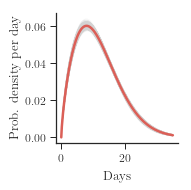

In [13]:
fig, ax = plt.subplots(1)
fig.set_size_inches(2.2,2.4)
clrs2 = sns.color_palette("hls", 10)

k_ = sampling_Fig1cd['k']
θ_ = sampling_Fig1cd['θ']
xx = np.linspace(0,35,200)
yy_ = lambda xx, k, θ: k/θ*(xx/θ)**(k-1)*np.exp(-(xx/θ)**k)
yy_trace = []
for idx in range(len(k_)):
    yy_trace.append([yy_(xx,k_[idx],θ_[idx])])
    if idx<2000:
        ax.plot(xx,yy_trace[-1][0],color='lightgrey',alpha=.3,lw=.3)
yy_median = ss.scoreatpercentile(yy_trace,[50],axis=0)[0][0]
ax.plot(xx,yy_median,color=clrs2[0],lw=2.5)
ax.set_xlabel("Days"); ax.set_ylabel("Prob. density per day");
ax.grid(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig("../figures/draft/Fig1c.pdf",format='pdf',bbox_inches='tight')

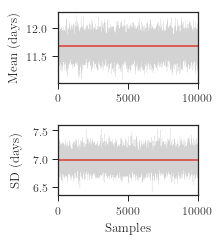

In [14]:
fig, axs = plt.subplots(2,1,sharex=False)
fig.set_size_inches(3.4,3)

ax = axs[0]
ax.plot(sampling_Fig1cd['delaymean'],c='lightgrey',lw=.25)
ax.axhline(y=df_Fig1cd.loc['delaymean','median'],c=clrs2[0],lw=2.0)
ax.set_ylabel("Mean (days)",labelpad=6);
ax.set_xlim(0,sampling_Fig1cd['delaymean'].shape[0])
# ax.yaxis.set_label_coords(-0.35, .5)
# ax.set_title('Samples')

ax = axs[1]
ax.plot(sampling_Fig1cd['delaysd'],c='lightgrey',lw=.25)
ax.axhline(y=df_Fig1cd.loc['delaysd','median'],c=clrs2[0],lw=2.0)
ax.set_xlabel("Samples"); 
ax.yaxis.set_label_coords(-0.25, .5)
ax.set_xlim(0,sampling_Fig1cd['delaymean'].shape[0])
ax.set_ylabel("SD (days)");

from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.tight_layout(rect=[0, -.2, 1, .99])
plt.savefig("../figures/draft/Fig1d.pdf",format='pdf',bbox_inches='tight')

## Now with respect to different epicurves

Calculation takes about 9 minutes

In [15]:
recalc = False
if(recalc):
    for idx,snapshot in enumerate(epicurves[::-1][3:]):  
        display(snapshot)
        df, df0 = make_df_and_df0(Df, snapshot)

        with pm.Model() as model:
            delaymean = pm.Flat('delaymean', testval=14.)
            k = pm.Flat('k', testval=2.)
            logθ = tt.log(delaymean/tt.gamma(1+1/k))

            μ = df['confirmed'].values*(1-tt.exp(-tt.exp(k*(df['logδt0'].values-logθ))))/\
                                         (1-tt.exp(-tt.exp(k*(df['logδt'].values-logθ))))
            pm.Poisson('confirmed0_likelihood', μ+0.001, observed=df['confirmed0'].values)

            loglks = tt.switch(tt.eq(μ,0), 0, df['confirmed0'].values*tt.log(μ)-μ-tt.gammaln(df['confirmed0'].values+1))
            loglk = pm.Deterministic('loglk',loglks.sum())
            pm.Deterministic('AIC',2*(2-loglk))

            vorder = [model[v.var] for v in model.bijection.ordering.vmap]
            solMLE = pm.find_MAP()
            hess = pm.find_hessian(solMLE,vars=vorder)
            cov =  np.linalg.inv(hess)
            
        display(solMLE)

        with pm.Model() as model_sample_from_prior:
            pars = pm.MvNormal('pars', mu=model.dict_to_array(solMLE), 
                               cov=np.diagflat(np.diag(cov)), shape=2)
            delaymean = pm.Deterministic('delaymean',pars[-1])
            k = pm.Deterministic('k',pars[0])
            θ = pm.Deterministic('θ',delaymean/tt.gamma(1+1/k))
            delaysd = pm.Deterministic('delaysd',θ*tt.sqrt(tt.gamma(1+2/k)-tt.gamma(1+1/k)**2))
            delayCV = pm.Deterministic('delayCV',delaysd/delaymean)

            sampling_Fig2ab = pm.sample_prior_predictive(10000)

        delaymean_p = ss.scoreatpercentile(sampling_Fig2ab['delaymean'],[50,2.5,97.5],axis=0)
        delaysd_p = ss.scoreatpercentile(sampling_Fig2ab['delaysd'],[50,2.5,97.5],axis=0)
        delayCV_p = ss.scoreatpercentile(sampling_Fig2ab['delayCV'],[50,2.5,97.5],axis=0)
        res = pd.DataFrame({'delaymean': delaymean_p, 'delaysd': delaysd_p, 'delayCV': delayCV_p}, 
                     index=['median','p2.5','p97.5']).T
        res['epicurve'] = snapshot
        res['loglk'] = solMLE['loglk']
        res['AIC'] = solMLE['AIC']
        display(res)

        out = res if idx==0 else pd.concat([out,res])
        
    out_no_switch = out.copy()
    out_no_switch.to_csv("../results/out_no_switch.csv")
else:
    out_no_switch = pd.read_csv("../results/out_no_switch.csv").rename(columns={'Unnamed: 0': 'index'}).set_index('index')
    out_no_switch['epicurve'] = pd.to_datetime(out_no_switch['epicurve'],format="%Y-%m-%d")

out_no_switch[:5]

,median,p2.5,p97.5,epicurve,loglk,AIC
index,,,,,,
delaymean,131.203382,-5509.168939,5784.423032,2018-08-29,-45.201646,94.403291
delaysd,3132.270642,-71579.811646,NaN,2018-08-29,-45.201646,94.403291
delayCV,3.156460,0.401641,NaN,2018-08-29,-45.201646,94.403291
delaymean,13.090257,-75.422322,105.556500,2018-09-02,-59.309441,122.618882
delaysd,42.321798,-1568.724222,NaN,2018-09-02,-59.309441,122.618882


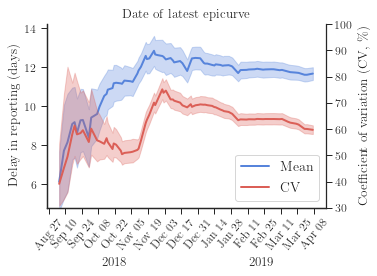

In [16]:
fig, ax = plt.subplots(1)
fig.set_size_inches(5,3.75)

ax2 = ax.twinx()
out0 = out_no_switch.loc['delayCV'][2:]
lns2 = ax2.plot(out0['epicurve'],out0['median']*100,lw=2,c=clrs2[0],label='CV');
ax2.fill_between(out0['epicurve'].get_values(),\
                 out0['p2.5'].get_values()*100,\
                 out0['p97.5'].get_values()*100,color=clrs2[0],\
                alpha=.3)
out0 = out_no_switch.loc['delaymean'][2:]
lns1 = ax.plot(out0['epicurve'],out0['median'],lw=2,c=clrs2[6],label='Mean');
ax.fill_between(out0['epicurve'].get_values(), 
                out0['p2.5'].get_values(), out0['p97.5'].get_values(),
                color=clrs2[6], alpha=.3)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))

ax.set_ylim(4.8,14.2); 
ax2.set_ylim(30,100); 
ax.set_ylabel("Delay in reporting (days)"); ax2.set_ylabel("Coefficient of variation (CV, \%)")

ax.annotate('2019', (0,0), (202, -48), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=13)
ax.annotate('2018', (0,0), (55, -48), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=13)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=4, frameon=True)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax.set_title("Date of latest epicurve");
fig.autofmt_xdate(rotation=50,ha="center")
plt.savefig("../figures/FigS1.pdf",format='pdf',bbox_inches='tight')

# Calculation of the optimal single point by MLE

## Both mean and SD are varied by the change point

In [17]:
def makeModel(switchpoint):
    with pm.Model() as model:
        # should be flat priors, where testval are initial conditions for optim-function
        delaymean = pm.Flat('delaymean', shape=2, testval=[14.]*2)
        k = pm.Flat('k', shape=2, testval=[1.5]*2)
        logθ = tt.log(delaymean/tt.gamma(1+1/k))

        # implementing the switching point
        weight = tt.switch(df['t'].values>=switchpoint, 1, 0)
        logθ_ = (1-weight)*logθ[0] + weight*logθ[1]
        k_ = (1-weight)*k[0] + weight*k[1]

        μ = df['confirmed'].values*\
                (1-tt.exp(-tt.exp(k_*(df['logδt0'].values-logθ_))))/\
                (1-tt.exp(-tt.exp(k_*(df['logδt'].values-logθ_))))
        pm.Poisson('likelihood', μ+0.001, observed=df['confirmed0'].values)
        
        loglks = tt.switch(tt.eq(μ,0), 0, df['confirmed0'].values*tt.log(μ)-μ-tt.gammaln(df['confirmed0'].values+1))
        loglk = pm.Deterministic('loglk',loglks.sum(0))
        pm.Deterministic('AIC',2*(5-loglk))
        
    return model

In [18]:
for idx,sw in enumerate(df0.t.values): 
    res = pm.find_MAP(model=makeModel(sw))
    res_ = pd.DataFrame({'switch_t': sw, 'delaymean0': float(res['delaymean'][0]), 
                         'delaymean1': float(res['delaymean'][1]), 'k0': float(res['k'][0]), 
                         'k1': float(res['k'][1]), 'loglk': float(res['loglk']), 'AIC': float(res['AIC'])},
                 index=[df0.loc[lambda d: d.t==sw,'date']])
    display(res_)
    dfMLE = dfMLE.append([res_]) if idx else res_
    
dfMLE = dfMLE.sort_values(by='AIC')
dfMLE[:5]

logp = -13,603, ||grad|| = 57.573: 100%|██████████| 8/8 [00:00<00:00, 465.72it/s]


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-04-30,0,14.0,11.671136,1.5,1.725503,-4816.409454,9642.818908


logp = -13,603, ||grad|| = 57.573: 100%|██████████| 8/8 [00:00<00:00, 863.31it/s]


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-05-07,7,14.0,11.671136,1.5,1.725503,-4816.409454,9642.818908


logp = -13,603, ||grad|| = 57.573: 100%|██████████| 8/8 [00:00<00:00, 2095.84it/s]


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-05-14,14,14.0,11.671136,1.5,1.725503,-4816.409454,9642.818908


logp = -13,603, ||grad|| = 57.573: 100%|██████████| 8/8 [00:00<00:00, 2100.43it/s]


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-05-21,21,14.0,11.671136,1.5,1.725503,-4816.409454,9642.818908


logp = -13,603, ||grad|| = 57.573: 100%|██████████| 8/8 [00:00<00:00, 2197.41it/s]


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-05-28,28,14.0,11.671136,1.5,1.725503,-4816.409454,9642.818908


logp = -13,603, ||grad|| = 57.573: 100%|██████████| 8/8 [00:00<00:00, 1969.85it/s]


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-06-04,35,14.0,11.671136,1.5,1.725503,-4816.409454,9642.818908


logp = -13,603, ||grad|| = 57.573: 100%|██████████| 8/8 [00:00<00:00, 2081.41it/s]


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-06-11,42,14.0,11.671136,1.5,1.725503,-4816.409454,9642.818908


logp = -13,603, ||grad|| = 57.573: 100%|██████████| 8/8 [00:00<00:00, 1995.27it/s]


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-06-18,49,14.0,11.671136,1.5,1.725503,-4816.409454,9642.818908


logp = -13,603, ||grad|| = 57.573: 100%|██████████| 8/8 [00:00<00:00, 1981.83it/s]


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-06-25,56,14.0,11.671136,1.5,1.725503,-4816.409454,9642.818908


logp = -13,603, ||grad|| = 57.573: 100%|██████████| 8/8 [00:00<00:00, 1882.33it/s]


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-07-02,63,14.0,11.671136,1.500004,1.725503,-4816.409458,9642.818916


logp = -13,603, ||grad|| = 57.573: 100%|██████████| 8/8 [00:00<00:00, 1873.40it/s]


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-07-09,70,14.0,11.671136,1.500004,1.725503,-4816.409458,9642.818916


logp = -13,603, ||grad|| = 57.573: 100%|██████████| 8/8 [00:00<00:00, 2095.19it/s]


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-07-16,77,13.999995,11.671136,1.500047,1.725503,-4816.409543,9642.819086


logp = -13,603, ||grad|| = 57.569: 100%|██████████| 8/8 [00:00<00:00, 1659.88it/s]


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-07-23,84,13.999848,11.671137,1.501468,1.725503,-4816.41329,9642.826579


logp = -13,521, ||grad|| = 2.1493: 100%|██████████| 50/50 [00:00<00:00, 2036.98it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-07-30,91,40.232521,11.669573,0.615719,1.725752,-4810.68834,9631.376681


logp = -13,524, ||grad|| = 2.0656: 100%|██████████| 21/21 [00:00<00:00, 1556.55it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-08-06,98,12.75274,11.70808,5.224964,1.720194,-4814.360183,9638.720365


logp = -13,524, ||grad|| = 0.49308: 100%|██████████| 20/20 [00:00<00:00, 1638.91it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-08-13,105,13.818696,11.704127,4.107576,1.720337,-4813.873284,9637.746568


logp = -13,522, ||grad|| = 4.4275: 100%|██████████| 20/20 [00:00<00:00, 2003.87it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-08-20,112,9.285994,11.72233,1.066341,1.723834,-4811.990618,9633.981236


logp = -13,525, ||grad|| = 2.2807: 100%|██████████| 17/17 [00:00<00:00, 2025.54it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-08-27,119,11.067329,11.689612,1.299017,1.726241,-4814.887638,9639.775277


logp = -13,526, ||grad|| = 0.71554: 100%|██████████| 25/25 [00:00<00:00, 1960.07it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-09-03,126,11.076725,11.70097,1.69985,1.724538,-4815.911679,9641.823358


logp = -13,524, ||grad|| = 0.57728: 100%|██████████| 24/24 [00:00<00:00, 1973.09it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-09-10,133,10.043429,11.768306,1.899145,1.717039,-4813.572796,9637.145593


logp = -13,531, ||grad|| = 36.414: 100%|██████████| 21/21 [00:00<00:00, 1307.55it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-09-17,140,11.099791,11.710675,1.760912,1.722732,-4815.97821,9641.95642


logp = -13,526, ||grad|| = 34.439: 100%|██████████| 17/17 [00:00<00:00, 1991.04it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-09-24,147,10.842977,11.738426,1.807838,1.719238,-4815.416441,9640.832882


logp = -13,526, ||grad|| = 15.29: 100%|██████████| 20/20 [00:00<00:00, 1954.07it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-10-01,154,12.413706,11.591816,1.796716,1.727117,-4814.215925,9638.43185


logp = -13,525, ||grad|| = 13.224: 100%|██████████| 17/17 [00:00<00:00, 1926.70it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-10-08,161,11.550025,11.68858,1.92795,1.71446,-4814.360833,9638.721667


logp = -13,521, ||grad|| = 34.12: 100%|██████████| 19/19 [00:00<00:00, 1357.17it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-10-15,168,12.153184,11.557659,1.93833,1.720758,-4810.250948,9630.501897


logp = -13,513, ||grad|| = 29.589: 100%|██████████| 16/16 [00:00<00:00, 1868.70it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-10-22,175,12.061313,11.498778,2.048014,1.714404,-4802.627916,9615.255832


logp = -13,510, ||grad|| = 30.422: 100%|██████████| 19/19 [00:00<00:00, 1959.18it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-10-29,182,12.171833,11.414728,2.042614,1.716953,-4798.42515,9606.8503


logp = -13,506, ||grad|| = 13.778: 100%|██████████| 18/18 [00:00<00:00, 1390.91it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-11-05,189,12.209638,11.332977,2.040821,1.721226,-4795.346666,9600.693332


logp = -13,521, ||grad|| = 13.903: 100%|██████████| 15/15 [00:00<00:00, 1984.94it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-11-12,196,12.516289,11.330469,1.675746,1.751996,-4810.975295,9631.95059


logp = -13,426, ||grad|| = 0.0069029: 100%|██████████| 22/22 [00:00<00:00, 1839.13it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-11-19,203,12.30937,11.242479,1.335217,2.038917,-4715.869978,9441.739956


logp = -13,420, ||grad|| = 16.372: 100%|██████████| 21/21 [00:00<00:00, 1401.19it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-11-26,210,11.89934,11.463022,1.349291,2.030496,-4707.159515,9424.31903


logp = -13,466, ||grad|| = 10.389: 100%|██████████| 18/18 [00:00<00:00, 1634.14it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-12-03,217,12.110691,11.307084,1.470291,2.016562,-4753.285358,9516.570716


logp = -13,468, ||grad|| = 7.6608: 100%|██████████| 21/21 [00:00<00:00, 1883.79it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-12-10,224,12.06202,11.345689,1.485275,2.011406,-4756.522839,9523.045678


logp = -13,439, ||grad|| = 5.5231: 100%|██████████| 20/20 [00:00<00:00, 1875.97it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-12-17,231,12.160646,11.151701,1.474917,2.146861,-4728.048077,9466.096154


logp = -13,434, ||grad|| = 0.0036418: 100%|██████████| 22/22 [00:00<00:00, 1771.65it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-12-24,238,12.181619,11.160384,1.471972,2.159238,-4723.455481,9456.910963


logp = -13,434, ||grad|| = 1.8247e-05: 100%|██████████| 22/22 [00:00<00:00, 1926.80it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-12-31,245,12.102447,11.24398,1.47962,2.153768,-4723.557811,9457.115622


logp = -13,437, ||grad|| = 8.551: 100%|██████████| 21/21 [00:00<00:00, 1899.39it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2019-01-07,252,12.018787,11.311705,1.495256,2.149553,-4726.669029,9463.338058


logp = -13,449, ||grad|| = 5.6142: 100%|██████████| 19/19 [00:00<00:00, 2024.43it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2019-01-14,259,12.108697,11.088852,1.51349,2.156218,-4739.140033,9488.280065


logp = -13,458, ||grad|| = 8.3996: 100%|██████████| 19/19 [00:00<00:00, 1853.21it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2019-01-21,266,12.050133,11.13038,1.532473,2.137738,-4748.104403,9506.208806


logp = -13,487, ||grad|| = 31.485: 100%|██████████| 21/21 [00:00<00:00, 1972.20it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2019-01-28,273,11.98521,11.023184,1.588085,2.144702,-4769.200741,9548.401481


logp = -13,480, ||grad|| = 37.153: 100%|██████████| 21/21 [00:00<00:00, 2040.41it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2019-02-04,280,11.942992,11.058936,1.598074,2.242081,-4759.961285,9529.92257


logp = -13,471, ||grad|| = 28.61: 100%|██████████| 20/20 [00:00<00:00, 1892.01it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2019-02-11,287,11.884298,11.334859,1.598887,2.230562,-4755.730286,9521.460571


logp = -13,477, ||grad|| = 38.767: 100%|██████████| 18/18 [00:00<00:00, 1950.99it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2019-02-18,294,11.944664,11.053164,1.602123,2.242652,-4761.670889,9533.341778


logp = -13,472, ||grad|| = 30.985: 100%|██████████| 20/20 [00:00<00:00, 1896.03it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2019-02-25,301,11.919513,11.317044,1.599473,2.235155,-4756.798089,9523.596179


logp = -13,467, ||grad|| = 13.919: 100%|██████████| 20/20 [00:00<00:00, 1906.29it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2019-03-04,308,11.814832,12.033256,1.607683,2.181418,-4753.22699,9516.45398


logp = -13,456, ||grad|| = 0.0049113: 100%|██████████| 22/22 [00:00<00:00, 1877.87it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2019-03-11,315,11.754662,12.598803,1.633873,2.2846,-4746.228351,9502.456701


logp = -13,467, ||grad|| = 38.635: 100%|██████████| 15/15 [00:00<00:00, 1787.60it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2019-03-18,322,11.796731,14.021394,1.641865,2.176982,-4756.208827,9522.417654


logp = -13,513, ||grad|| = 0.075158: 100%|██████████| 48/48 [00:00<00:00, 1919.11it/s]  


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2019-03-25,329,11.68263,292.509676,1.714877,2.140018,-4802.63566,9615.27132


logp = -13,603, ||grad|| = 57.573: 100%|██████████| 8/8 [00:00<00:00, 1902.29it/s]


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2019-04-01,336,11.671136,14.0,1.725503,1.5,-4816.409454,9642.818908


,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-11-26,210,11.899340,11.463022,1.349291,2.030496,-4707.159515,9424.319030
2018-11-19,203,12.309370,11.242479,1.335217,2.038917,-4715.869978,9441.739956
2018-12-24,238,12.181619,11.160384,1.471972,2.159238,-4723.455481,9456.910963
2018-12-31,245,12.102447,11.243980,1.479620,2.153768,-4723.557811,9457.115622
2019-01-07,252,12.018787,11.311705,1.495256,2.149553,-4726.669029,9463.338058


In [19]:
# best model
dfMLE.iloc[:1]

,switch_t,delaymean0,delaymean1,k0,k1,loglk,AIC
date,,,,,,,
2018-11-26,210,11.89934,11.463022,1.349291,2.030496,-4707.159515,9424.31903


In [20]:
best_model = makeModel(dfMLE['switch_t'][0])
with best_model:
    vorder = [best_model[v.var] for v in best_model.bijection.ordering.vmap]
    solMLE = pm.find_MAP()
    hess = pm.find_hessian(solMLE,vars=vorder)
    cov =  np.linalg.inv(hess)
        
display(pm.find_MAP(return_raw=True,model=best_model))

logp = -13,420, ||grad|| = 16.372: 100%|██████████| 21/21 [00:00<00:00, 1924.58it/s]  
logp = -13,420, ||grad|| = 16.372: 100%|██████████| 21/21 [00:00<00:00, 1990.79it/s]  


({'delaymean': array([11.89933983, 11.46302227]),
  'k': array([1.34929072, 2.0304961 ]),
  'loglk': array(-4707.15951499),
  'AIC': array(9424.31902999)},
       fun: 13417.240675793324
  hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
       jac: array([-0.007894  ,  0.00278517, -0.0003412 ,  0.00055151])
   message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
      nfev: 20
       nit: 17
    status: 0
   success: True
         x: array([ 1.34929072,  2.0304961 , 11.89933983, 11.46302227]))

In [21]:
with pm.Model() as model_sampling:
    pars = pm.MvNormal('pars', mu=best_model.dict_to_array(solMLE), cov=np.diagflat(np.diag(cov)), shape=4)
    delaymean = pm.Deterministic('delaymean',pars[-2:])
    k = pm.Deterministic('k',pars[:-2])
    θ = pm.Deterministic('θ',delaymean/tt.gamma(1+1/k))
    delayCV = pm.Deterministic('delayCV',tt.sqrt(tt.exp(tt.gammaln(1+2/k)-2*tt.gammaln(1+1/k))-1))
    delaysd = pm.Deterministic('delaysd',delaymean*delayCV)
    
    sampling = pm.sample_prior_predictive(10000)

sampling

{'delaymean': array([[12.26274206, 11.34041009],
        [11.66456962, 11.56827625],
        [12.56025471, 11.37744827],
        ...,
        [11.67598649, 11.54558551],
        [11.66045194, 11.35326068],
        [11.83270492, 11.76299412]]),
 'delaysd': array([[9.18848681, 5.77015858],
        [8.80231079, 5.87675086],
        [9.68673426, 5.83681551],
        ...,
        [8.46016978, 5.9653847 ],
        [8.34203459, 5.86716754],
        [8.91703482, 6.01078572]]),
 'delayCV': array([[0.74930116, 0.50881393],
        [0.75461942, 0.50800575],
        [0.77122116, 0.51301622],
        ...,
        [0.72457859, 0.516681  ],
        [0.71541263, 0.5167826 ],
        [0.75359226, 0.51099113]]),
 'k': array([[1.34889408, 2.06087832],
        [1.33874208, 2.06452621],
        [1.30805941, 2.04210991],
        ...,
        [1.39828373, 2.02601089],
        [1.41756674, 2.02556811],
        [1.34069032, 2.05111284]]),
 'θ': array([[13.37087914, 12.80186986],
        [12.70128912, 13.059349

In [22]:
delaymean__0_p = ss.scoreatpercentile(sampling['delaymean'][:,0],[50,2.5,97.5],axis=0)
delaymean__1_p = ss.scoreatpercentile(sampling['delaymean'][:,1],[50,2.5,97.5],axis=0)
delaysd__0_p = ss.scoreatpercentile(sampling['delaysd'][:,0],[50,2.5,97.5],axis=0)
delaysd__1_p = ss.scoreatpercentile(sampling['delaysd'][:,1],[50,2.5,97.5],axis=0)
delayCV__0_p = ss.scoreatpercentile(sampling['delayCV'][:,0],[50,2.5,97.5],axis=0)
delayCV__1_p = ss.scoreatpercentile(sampling['delayCV'][:,1],[50,2.5,97.5],axis=0)
df_= pd.DataFrame({'delaymean__0': delaymean__0_p, 'delaymean__1': delaymean__1_p,
                   'delaysd__0': delaysd__0_p, 'delaysd__1': delaysd__1_p, 
                   'delayCV__0': delayCV__0_p, 'delayCV__1': delayCV__1_p}, 
             index=['median','p2.5','p97.5']).T
df_

,median,p2.5,p97.5
delaymean__0,11.899840,11.256134,12.558306
delaymean__1,11.461699,11.106031,11.815399
delaysd__0,8.915643,8.247317,9.648905
delaysd__1,5.909583,5.658841,6.169889
delayCV__0,0.749304,0.707754,0.795351
delayCV__1,0.515688,0.500488,0.531696


## Only mean is varied by the change point

In [23]:
def makeModel(switchpoint):
    with pm.Model() as model:
        # should be flat priors, where testval are initial conditions for optim-function
        delaysd = pm.Flat('delaysd', testval=9.)
        k = pm.Flat('k', shape=2, testval=[1.5]*2)
        logθ = tt.log(delaysd/tt.sqrt(tt.gamma(1+2/k)-tt.gamma(1+1/k)**2))

        # implementing the switching point
        weight = tt.switch(df['t'].values>=switchpoint, 1, 0)
        logθ_ = (1-weight)*logθ[0] + weight*logθ[1]
        k_ = (1-weight)*k[0] + weight*k[1]

        μ = df['confirmed'].values*\
                (1-tt.exp(-tt.exp(k_*(df['logδt0'].values-logθ_))))/\
                (1-tt.exp(-tt.exp(k_*(df['logδt'].values-logθ_))))
        pm.Poisson('likelihood', μ+0.001, observed=df['confirmed0'].values)
        
        loglks = tt.switch(tt.eq(μ,0), 0, df['confirmed0'].values*tt.log(μ)-μ-tt.gammaln(df['confirmed0'].values+1))
        loglk = pm.Deterministic('loglk',loglks.sum(0))
        pm.Deterministic('AIC',2*(4-loglk))
        
    return model

In [24]:
for idx,sw in enumerate(df0.t.values): 
    res = pm.find_MAP(model=makeModel(sw))
    res_ = pd.DataFrame({'switch_t': sw, 'delaysd': float(res['delaysd']), 'k0': float(res['k'][0]), 
                         'k1': float(res['k'][1]), 'loglk': float(res['loglk']), 'AIC': float(res['AIC'])},
                 index=[df0.loc[lambda d: d.t==sw,'date']])
    display(res_)
    dfMLE = dfMLE.append([res_]) if idx else res_
    
dfMLE = dfMLE.sort_values(by='AIC')
dfMLE[:5]

logp = -13,526, ||grad|| = 4.2707: 100%|██████████| 15/15 [00:00<00:00, 1489.67it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-04-30,0,6.971625,1.5,1.725504,-4816.409454,9640.818908


logp = -13,526, ||grad|| = 4.2707: 100%|██████████| 15/15 [00:00<00:00, 1354.11it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-05-07,7,6.971625,1.5,1.725504,-4816.409454,9640.818908


logp = -13,526, ||grad|| = 4.2707: 100%|██████████| 15/15 [00:00<00:00, 1713.78it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-05-14,14,6.971625,1.5,1.725504,-4816.409454,9640.818908


logp = -13,526, ||grad|| = 4.2707: 100%|██████████| 15/15 [00:00<00:00, 1730.80it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-05-21,21,6.971625,1.5,1.725504,-4816.409454,9640.818908


logp = -13,526, ||grad|| = 4.2707: 100%|██████████| 15/15 [00:00<00:00, 1708.10it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-05-28,28,6.971625,1.5,1.725504,-4816.409454,9640.818908


logp = -13,526, ||grad|| = 4.2707: 100%|██████████| 15/15 [00:00<00:00, 1753.57it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-06-04,35,6.971625,1.5,1.725504,-4816.409454,9640.818908


logp = -13,526, ||grad|| = 4.2707: 100%|██████████| 15/15 [00:00<00:00, 1828.38it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-06-11,42,6.971625,1.5,1.725504,-4816.409454,9640.818908


logp = -13,526, ||grad|| = 4.2707: 100%|██████████| 15/15 [00:00<00:00, 1873.63it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-06-18,49,6.971625,1.5,1.725504,-4816.409454,9640.818908


logp = -13,526, ||grad|| = 4.2707: 100%|██████████| 15/15 [00:00<00:00, 1598.93it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-06-25,56,6.971625,1.5,1.725504,-4816.409454,9640.818908


logp = -13,526, ||grad|| = 4.2731: 100%|██████████| 15/15 [00:00<00:00, 1842.84it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-07-02,63,6.971625,1.500001,1.725504,-4816.409454,9640.818908


logp = -13,526, ||grad|| = 4.2731: 100%|██████████| 15/15 [00:00<00:00, 1835.42it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-07-09,70,6.971625,1.500001,1.725504,-4816.409454,9640.818908


logp = -13,526, ||grad|| = 4.2722: 100%|██████████| 15/15 [00:00<00:00, 1886.44it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-07-16,77,6.971625,1.500003,1.725504,-4816.409454,9640.818909


logp = -13,526, ||grad|| = 4.1727: 100%|██████████| 15/15 [00:00<00:00, 1735.29it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-07-23,84,6.971623,1.500161,1.725504,-4816.409481,9640.818962


logp = -13,526, ||grad|| = 0.61709: 100%|██████████| 14/14 [00:00<00:00, 1807.50it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-07-30,91,6.971501,1.505926,1.725518,-4816.409355,9640.81871


logp = -inf, ||grad|| = 0: 100%|██████████| 22/22 [00:00<00:00, 1896.28it/s]          


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-08-06,98,6.989478,-0.452837,1.72685,NaN,NaN


logp = -13,526, ||grad|| = 0.28325: 100%|██████████| 23/23 [00:00<00:00, 1807.11it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-08-13,105,6.974236,1.700817,1.72519,-4816.406136,9640.812271


logp = -13,523, ||grad|| = 10.94: 100%|██████████| 16/16 [00:00<00:00, 1934.87it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-08-20,112,7.021466,1.282629,1.722086,-4812.282398,9632.564796


logp = -13,529, ||grad|| = 188.8: 100%|██████████| 20/20 [00:00<00:00, 1750.40it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-08-27,119,6.999731,1.542202,1.723593,-4815.303964,9638.607928


logp = -13,526, ||grad|| = 0.91029: 100%|██████████| 14/14 [00:00<00:00, 1735.18it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-09-03,126,6.985681,1.653346,1.725525,-4815.94526,9639.890521


logp = -13,525, ||grad|| = 18.98: 100%|██████████| 15/15 [00:00<00:00, 1376.66it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-09-10,133,7.007112,1.59683,1.724175,-4814.959178,9637.918355


logp = -13,526, ||grad|| = 6.9096: 100%|██████████| 16/16 [00:00<00:00, 1947.78it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-09-17,140,6.981396,1.683752,1.725947,-4816.158041,9640.316082


logp = -13,526, ||grad|| = 19.198: 100%|██████████| 15/15 [00:00<00:00, 1752.69it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-09-24,147,6.986096,1.673924,1.725744,-4816.027713,9640.055426


logp = -13,525, ||grad|| = 99.842: 100%|██████████| 17/17 [00:00<00:00, 1929.30it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-10-01,154,6.937729,1.831463,1.724511,-4814.278322,9636.556644


logp = -13,525, ||grad|| = 2.4069: 100%|██████████| 15/15 [00:00<00:00, 1782.94it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-10-08,161,6.930895,1.794509,1.726641,-4815.398521,9638.797043


logp = -13,522, ||grad|| = 105.61: 100%|██████████| 16/16 [00:00<00:00, 1790.09it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-10-15,168,6.86653,1.874396,1.728069,-4810.543994,9629.087987


logp = -13,515, ||grad|| = 84.559: 100%|██████████| 16/16 [00:00<00:00, 1723.70it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-10-22,175,6.776868,1.921237,1.732074,-4803.973824,9615.947647


logp = -13,510, ||grad|| = 76.868: 100%|██████████| 16/16 [00:00<00:00, 1952.26it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-10-29,182,6.732584,1.940485,1.732635,-4799.380839,9606.761677


logp = -13,508, ||grad|| = 61.959: 100%|██████████| 17/17 [00:00<00:00, 1936.22it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-11-05,189,6.674989,1.95402,1.736044,-4796.095738,9600.191476


logp = -13,530, ||grad|| = 217.8: 100%|██████████| 17/17 [00:00<00:00, 1878.43it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-11-12,196,6.928334,1.783107,1.71765,-4813.824247,9635.648494


logp = -13,461, ||grad|| = 52.815: 100%|██████████| 17/17 [00:00<00:00, 1930.66it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-11-19,203,6.555012,1.600814,1.898509,-4750.376892,9508.753785


logp = -13,444, ||grad|| = 56.754: 100%|██████████| 17/17 [00:00<00:00, 1952.66it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-11-26,210,6.610301,1.581857,1.908565,-4733.200808,9474.401616


logp = -13,505, ||grad|| = 343.5: 100%|██████████| 17/17 [00:00<00:00, 1938.53it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-12-03,217,6.701856,1.653236,1.870493,-4776.471436,9560.942872


logp = -13,502, ||grad|| = 319.68: 100%|██████████| 18/18 [00:00<00:00, 1852.97it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-12-10,224,6.760111,1.653713,1.864655,-4777.935985,9563.87197


logp = -13,485, ||grad|| = 281.68: 100%|██████████| 18/18 [00:00<00:00, 1857.99it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-12-17,231,6.571678,1.675255,1.930506,-4763.631308,9535.262616


logp = -13,481, ||grad|| = 262.8: 100%|██████████| 18/18 [00:00<00:00, 1948.17it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-12-24,238,6.60607,1.672994,1.933879,-4761.026327,9530.052655


logp = -13,477, ||grad|| = 277.68: 100%|██████████| 18/18 [00:00<00:00, 1970.18it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-12-31,245,6.661995,1.666907,1.93428,-4757.787394,9523.574789


logp = -13,475, ||grad|| = 264.08: 100%|██████████| 19/19 [00:00<00:00, 1587.58it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2019-01-07,252,6.7248,1.663245,1.932625,-4757.022023,9522.044046


logp = -13,488, ||grad|| = 207.34: 100%|██████████| 19/19 [00:00<00:00, 1957.07it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2019-01-14,259,6.809709,1.670199,1.905018,-4772.122017,9552.244033


logp = -13,488, ||grad|| = 140.49: 100%|██████████| 17/17 [00:00<00:00, 1938.48it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2019-01-21,266,6.902309,1.665726,1.894242,-4775.431659,9558.863319


logp = -13,507, ||grad|| = 176.98: 100%|██████████| 18/18 [00:00<00:00, 1864.37it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2019-01-28,273,6.906585,1.68865,1.883125,-4790.937327,9589.874654


logp = -13,495, ||grad|| = 11.612: 100%|██████████| 15/15 [00:00<00:00, 1831.95it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2019-02-04,280,6.848408,1.697735,1.932422,-4784.450404,9576.900808


logp = -13,494, ||grad|| = 168.83: 100%|██████████| 18/18 [00:00<00:00, 1882.54it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2019-02-11,287,6.896295,1.687912,1.957449,-4775.535289,9559.070579


logp = -13,501, ||grad|| = 164.41: 100%|██████████| 17/17 [00:00<00:00, 1907.37it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2019-02-18,294,6.924423,1.690729,1.935583,-4784.106666,9576.213331


logp = -13,490, ||grad|| = 105.48: 100%|██████████| 16/16 [00:00<00:00, 1910.68it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2019-02-25,301,6.979463,1.68055,1.960787,-4775.678553,9559.357105


logp = -13,474, ||grad|| = 87.493: 100%|██████████| 16/16 [00:00<00:00, 1932.47it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2019-03-04,308,7.145549,1.655376,1.992031,-4761.362726,9530.725452


logp = -13,465, ||grad|| = 121.53: 100%|██████████| 18/18 [00:00<00:00, 1948.88it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2019-03-11,315,7.165294,1.660883,2.101916,-4750.806738,9509.613476


logp = -13,469, ||grad|| = 103.21: 100%|██████████| 17/17 [00:00<00:00, 1841.17it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2019-03-18,322,7.349298,1.644795,2.127114,-4756.402818,9520.805636


logp = -13,521, ||grad|| = 52.386: 100%|██████████| 20/20 [00:00<00:00, 1947.67it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2019-03-25,329,7.019553,1.714611,2.454565,-4802.829535,9613.659071


logp = -13,526, ||grad|| = 4.2707: 100%|██████████| 15/15 [00:00<00:00, 1834.35it/s]  


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2019-04-01,336,6.971625,1.725504,1.5,-4816.409454,9640.818908


,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-11-26,210,6.610301,1.581857,1.908565,-4733.200808,9474.401616
2018-11-19,203,6.555012,1.600814,1.898509,-4750.376892,9508.753785
2019-03-11,315,7.165294,1.660883,2.101916,-4750.806738,9509.613476
2019-03-18,322,7.349298,1.644795,2.127114,-4756.402818,9520.805636
2019-01-07,252,6.724800,1.663245,1.932625,-4757.022023,9522.044046


In [25]:
# best model
dfMLE.iloc[:1]

,switch_t,delaysd,k0,k1,loglk,AIC
date,,,,,,
2018-11-26,210,6.610301,1.581857,1.908565,-4733.200808,9474.401616


In [26]:
best_model = makeModel(dfMLE['switch_t'][0])
with best_model:
    vorder = [best_model[v.var] for v in best_model.bijection.ordering.vmap]
    solMLE = pm.find_MAP()
    hess = pm.find_hessian(solMLE,vars=vorder)
    cov =  np.linalg.inv(hess)
        
display(pm.find_MAP(return_raw=True,model=best_model))

logp = -13,444, ||grad|| = 56.754: 100%|██████████| 17/17 [00:00<00:00, 1887.98it/s]  
logp = -13,444, ||grad|| = 56.754: 100%|██████████| 17/17 [00:00<00:00, 1855.79it/s]  


({'delaysd': array(6.61030112),
  'k': array([1.58185682, 1.90856526]),
  'loglk': array(-4733.20080802),
  'AIC': array(9474.40161604)},
       fun: 13443.271978698513
  hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
       jac: array([-0.0030426 ,  0.00158595, -0.0003033 ])
   message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
      nfev: 16
       nit: 14
    status: 0
   success: True
         x: array([1.58185682, 1.90856526, 6.61030112]))

In [27]:
with pm.Model() as model_sampling:
    pars = pm.MvNormal('pars', mu=best_model.dict_to_array(solMLE), cov=np.diagflat(np.diag(cov)), shape=3)
    delaysd = pm.Deterministic('delaysd',pars[-1])
    k = pm.Deterministic('k',pars[:-1])
    θ = pm.Deterministic('θ',delaysd/tt.sqrt(tt.gamma(1+2/k)-tt.gamma(1+1/k)**2))
    delayCV = pm.Deterministic('delayCV',tt.sqrt(tt.exp(tt.gammaln(1+2/k)-2*tt.gammaln(1+1/k))-1))
    delaymean = pm.Deterministic('delaymean',delaysd/delayCV)
    
    sampling = pm.sample_prior_predictive(10000)

sampling

{'delaymean': array([[10.48164594, 12.20227539],
        [10.2274752 , 11.50503791],
        [10.41756133, 12.38426962],
        ...,
        [10.0385031 , 12.17724797],
        [10.0696872 , 11.82081961],
        [ 9.8253496 , 12.0977455 ]]),
 'delaysd': array([6.69276405, 6.49352767, 6.76985261, ..., 6.64728046, 6.50844133,
        6.45381463]),
 'delayCV': array([[0.63852224, 0.54848492],
        [0.63491014, 0.56440732],
        [0.64985004, 0.54664932],
        ...,
        [0.66217845, 0.54587707],
        [0.64633997, 0.55059138],
        [0.65685343, 0.53347251]]),
 'k': array([[1.60378899, 1.89603855],
        [1.61377055, 1.83691943],
        [1.57327916, 1.90309496],
        ...,
        [1.54138257, 1.90607906],
        [1.58260681, 1.88800385],
        [1.55499722, 1.95529833]]),
 'θ': array([[11.69330465, 13.75023346],
        [11.41610909, 12.94925618],
        [11.60059437, 13.95697775],
        ...,
        [11.1547475 , 13.72433936],
        [11.21971213, 13.31850842]

In [28]:
delaymean__0_p = ss.scoreatpercentile(sampling['delaymean'][:,0],[50,2.5,97.5],axis=0)
delaymean__1_p = ss.scoreatpercentile(sampling['delaymean'][:,1],[50,2.5,97.5],axis=0)
delaysd_p = ss.scoreatpercentile(sampling['delaysd'],[50,2.5,97.5],axis=0)
delayCV__0_p = ss.scoreatpercentile(sampling['delayCV'][:,0],[50,2.5,97.5],axis=0)
delayCV__1_p = ss.scoreatpercentile(sampling['delayCV'][:,1],[50,2.5,97.5],axis=0)
df_= pd.DataFrame({'delaymean__0': delaymean__0_p, 'delaymean__1': delaymean__1_p,
                   'delaysd': delaysd_p, 
                   'delayCV__0': delayCV__0_p, 'delayCV__1': delayCV__1_p}, 
             index=['median','p2.5','p97.5']).T
df_

,median,p2.5,p97.5
delaymean__0,10.223442,9.602784,10.856410
delaymean__1,12.118828,11.419671,12.838697
delaysd,6.609421,6.277190,6.943012
delayCV__0,0.646714,0.625138,0.669772
delayCV__1,0.545241,0.530161,0.561642


## Only SD is varied

In [29]:
def makeModel(switchpoint):
    with pm.Model() as model:
        # should be flat priors, where testval are initial conditions for optim-function
        delaymean = pm.Flat('delaymean', testval=12.)
        k = pm.Flat('k', shape=2, testval=[1.5]*2)
        logθ = tt.log(delaymean/tt.gamma(1+1/k))

        # implementing the switching point
        weight = tt.switch(df['t'].values>=switchpoint, 1, 0)
        logθ_ = (1-weight)*logθ[0] + weight*logθ[1]
        k_ = (1-weight)*k[0] + weight*k[1]

        μ = df['confirmed'].values*\
                (1-tt.exp(-tt.exp(k_*(df['logδt0'].values-logθ_))))/\
                (1-tt.exp(-tt.exp(k_*(df['logδt'].values-logθ_))))
        pm.Poisson('likelihood', μ+0.001, observed=df['confirmed0'].values)
        
        loglks = tt.switch(tt.eq(μ,0), 0, df['confirmed0'].values*tt.log(μ)-μ-tt.gammaln(df['confirmed0'].values+1))
        loglk = pm.Deterministic('loglk',loglks.sum(0))
        pm.Deterministic('AIC',2*(4-loglk))
        
    return model

In [30]:
for idx,sw in enumerate(df0.t.values): 
    res = pm.find_MAP(model=makeModel(sw))
    res_ = pd.DataFrame({'switch_t': sw, 'delaymean': float(res['delaymean']), 'k0': float(res['k'][0]), 
                  'k1': float(res['k'][1]), 'loglk': float(res['loglk']), 'AIC': float(res['AIC'])},
                 index=[df0.loc[lambda d: d.t==sw,'date']])
    display(res_)
    dfMLE = dfMLE.append([res_]) if idx else res_
    
dfMLE = dfMLE.sort_values(by='AIC')
dfMLE[:5]

logp = -13,569, ||grad|| = 403.33: 100%|██████████| 11/11 [00:00<00:00, 1990.74it/s]


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-04-30,0,11.671141,1.5,1.725502,-4816.409454,9640.818908


logp = -13,569, ||grad|| = 403.33: 100%|██████████| 11/11 [00:00<00:00, 1941.64it/s]


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-05-07,7,11.671141,1.5,1.725502,-4816.409454,9640.818908


logp = -13,569, ||grad|| = 403.33: 100%|██████████| 11/11 [00:00<00:00, 1907.68it/s]


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-05-14,14,11.671141,1.5,1.725502,-4816.409454,9640.818908


logp = -13,569, ||grad|| = 403.33: 100%|██████████| 11/11 [00:00<00:00, 2009.12it/s]


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-05-21,21,11.671141,1.5,1.725502,-4816.409454,9640.818908


logp = -13,569, ||grad|| = 403.33: 100%|██████████| 11/11 [00:00<00:00, 1321.42it/s]


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-05-28,28,11.671141,1.5,1.725502,-4816.409454,9640.818908


logp = -13,569, ||grad|| = 403.33: 100%|██████████| 11/11 [00:00<00:00, 1611.39it/s]


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-06-04,35,11.671141,1.5,1.725502,-4816.409454,9640.818908


logp = -13,569, ||grad|| = 403.33: 100%|██████████| 11/11 [00:00<00:00, 2042.20it/s]


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-06-11,42,11.671141,1.5,1.725502,-4816.409454,9640.818908


logp = -13,569, ||grad|| = 403.33: 100%|██████████| 11/11 [00:00<00:00, 1989.36it/s]


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-06-18,49,11.671141,1.5,1.725502,-4816.409454,9640.818908


logp = -13,569, ||grad|| = 403.33: 100%|██████████| 11/11 [00:00<00:00, 2039.94it/s]


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-06-25,56,11.671141,1.5,1.725502,-4816.409454,9640.818908


logp = -13,569, ||grad|| = 403.33: 100%|██████████| 11/11 [00:00<00:00, 1416.26it/s]


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-07-02,63,11.671141,1.5,1.725502,-4816.409454,9640.818908


logp = -13,569, ||grad|| = 403.33: 100%|██████████| 11/11 [00:00<00:00, 2010.08it/s]


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-07-09,70,11.671141,1.5,1.725502,-4816.409454,9640.818908


logp = -13,569, ||grad|| = 403.33: 100%|██████████| 11/11 [00:00<00:00, 2090.22it/s]


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-07-16,77,11.67114,1.500008,1.725502,-4816.409458,9640.818916


logp = -13,569, ||grad|| = 403.32: 100%|██████████| 11/11 [00:00<00:00, 2115.52it/s]


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-07-23,84,11.67113,1.500364,1.725503,-4816.409802,9640.819604


logp = -13,526, ||grad|| = 4.6017: 100%|██████████| 18/18 [00:00<00:00, 1960.51it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-07-30,91,16.418236,-18.589297,1.396335,NaN,NaN


logp = -13,525, ||grad|| = 0.97594: 100%|██████████| 20/20 [00:00<00:00, 1813.05it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-08-06,98,11.707683,4.086879,1.720336,-4814.361621,9636.723242


logp = -13,525, ||grad|| = 2.2069: 100%|██████████| 14/14 [00:00<00:00, 1832.95it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-08-13,105,11.723729,2.580165,1.718345,-4814.941987,9637.883974


logp = -13,524, ||grad|| = 0.01698: 100%|██████████| 13/13 [00:00<00:00, 1862.42it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-08-20,112,11.682096,1.041322,1.727868,-4813.628519,9635.257038


logp = -13,525, ||grad|| = 0.00028716: 100%|██████████| 12/12 [00:00<00:00, 1775.12it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-08-27,119,11.674171,1.273822,1.727791,-4815.051718,9638.103436


logp = -13,569, ||grad|| = 399.93: 100%|██████████| 11/11 [00:00<00:00, 1855.29it/s]


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-09-03,126,11.675711,1.622812,1.726985,-4816.184974,9640.369948


logp = -13,526, ||grad|| = 0.00021016: 100%|██████████| 12/12 [00:00<00:00, 1834.18it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-09-10,133,11.674739,1.665363,1.726362,-4816.327771,9640.655543


logp = -13,526, ||grad|| = 0.052216: 100%|██████████| 13/13 [00:00<00:00, 1789.73it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-09-17,140,11.672815,1.691737,1.72651,-4816.365133,9640.730266


logp = -13,526, ||grad|| = 6.5882: 100%|██████████| 15/15 [00:00<00:00, 1830.29it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-09-24,147,11.671567,1.712735,1.725929,-4816.402757,9640.805513


logp = -13,526, ||grad|| = 19.803: 100%|██████████| 17/17 [00:00<00:00, 1825.15it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-10-01,154,11.673285,1.879333,1.718904,-4815.276755,9638.553511


logp = -13,525, ||grad|| = 25.516: 100%|██████████| 17/17 [00:00<00:00, 1836.43it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-10-08,161,11.667786,1.913094,1.716534,-4814.405097,9636.810193


logp = -13,521, ||grad|| = 9.3197: 100%|██████████| 15/15 [00:00<00:00, 1899.59it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-10-15,168,11.667267,2.004625,1.709756,-4811.206233,9630.412465


logp = -13,514, ||grad|| = 1.242: 100%|██████████| 14/14 [00:00<00:00, 1843.77it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-10-22,175,11.637202,2.117968,1.700646,-4803.702123,9615.404246


logp = -13,511, ||grad|| = 0.039383: 100%|██████████| 13/13 [00:00<00:00, 1426.15it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-10-29,182,11.617214,2.139376,1.696899,-4800.48104,9608.962081


logp = -13,508, ||grad|| = 0.080504: 100%|██████████| 13/13 [00:00<00:00, 1717.08it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-11-05,189,11.600464,2.152277,1.694763,-4798.360129,9604.720258


logp = -13,526, ||grad|| = 0.0033589: 100%|██████████| 12/12 [00:00<00:00, 1921.28it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-11-12,196,11.671735,1.763349,1.717462,-4816.066201,9640.132401


logp = -13,430, ||grad|| = 0.010573: 100%|██████████| 13/13 [00:00<00:00, 1939.80it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-11-19,203,11.478049,1.389976,2.007993,-4719.702792,9447.405584


logp = -13,418, ||grad|| = 0.0051328: 100%|██████████| 12/12 [00:00<00:00, 1777.12it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-11-26,210,11.569621,1.372538,2.017092,-4707.8391,9423.678199


logp = -13,466, ||grad|| = 0.058753: 100%|██████████| 13/13 [00:00<00:00, 1796.04it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-12-03,217,11.571688,1.512944,1.983187,-4756.034373,9520.068746


logp = -13,469, ||grad|| = 0.074623: 100%|██████████| 13/13 [00:00<00:00, 1892.08it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-12-10,224,11.609741,1.522236,1.979136,-4758.793805,9525.58761


logp = -13,443, ||grad|| = 0.0075907: 100%|██████████| 12/12 [00:00<00:00, 1998.72it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-12-17,231,11.52124,1.525964,2.095189,-4732.798172,9473.596344


logp = -13,438, ||grad|| = 0.30644: 100%|██████████| 14/14 [00:00<00:00, 1826.11it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-12-24,238,11.557228,1.52248,2.10521,-4728.4046,9464.8092


logp = -13,437, ||grad|| = 0.00022016: 100%|██████████| 12/12 [00:00<00:00, 1897.59it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-12-31,245,11.604688,1.520822,2.106293,-4727.075077,9462.150154


logp = -13,439, ||grad|| = 0.020188: 100%|██████████| 12/12 [00:00<00:00, 1875.74it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2019-01-07,252,11.638928,1.527433,2.107657,-4729.0558,9466.111599


logp = -13,454, ||grad|| = 0.29766: 100%|██████████| 14/14 [00:00<00:00, 1915.64it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2019-01-14,259,11.625512,1.554674,2.087823,-4744.090454,9496.180907


logp = -13,462, ||grad|| = 0.23247: 100%|██████████| 14/14 [00:00<00:00, 1345.22it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2019-01-21,266,11.672597,1.56572,2.071711,-4751.890531,9511.781062


logp = -13,483, ||grad|| = 0.057076: 100%|██████████| 13/13 [00:00<00:00, 1747.12it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2019-01-28,273,11.661176,1.617798,2.065779,-4773.08454,9554.16908


logp = -13,473, ||grad|| = 0.0028271: 100%|██████████| 12/12 [00:00<00:00, 1782.85it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2019-02-04,280,11.656597,1.624531,2.163479,-4763.229533,9534.459067


logp = -13,467, ||grad|| = 0.001524: 100%|██████████| 12/12 [00:00<00:00, 1864.83it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2019-02-11,287,11.720224,1.614271,2.183638,-4756.901435,9521.802869


logp = -13,475, ||grad|| = 0.0016822: 100%|██████████| 12/12 [00:00<00:00, 1901.96it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2019-02-18,294,11.70193,1.624852,2.162737,-4764.615355,9537.23071


logp = -13,468, ||grad|| = 0.0012612: 100%|██████████| 12/12 [00:00<00:00, 1904.84it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2019-02-25,301,11.7673,1.613901,2.183956,-4758.037394,9524.074787


logp = -13,463, ||grad|| = 0.011756: 100%|██████████| 13/13 [00:00<00:00, 1882.54it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2019-03-04,308,11.856418,1.603648,2.199062,-4753.347867,9514.695734


logp = -13,458, ||grad|| = 0.21958: 100%|██████████| 13/13 [00:00<00:00, 1910.51it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2019-03-11,315,11.864896,1.623106,2.358816,-4747.486911,9502.973822


logp = -13,468, ||grad|| = 4.1898: 100%|██████████| 15/15 [00:00<00:00, 1814.56it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2019-03-18,322,11.878789,1.633828,2.338559,-4758.229953,9524.459906


logp = -13,513, ||grad|| = 3.0889: 100%|██████████| 16/16 [00:00<00:00, 1960.76it/s]  


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2019-03-25,329,11.687344,1.714354,2.836243,-4803.181836,9614.363671


logp = -13,569, ||grad|| = 403.33: 100%|██████████| 11/11 [00:00<00:00, 2067.09it/s]


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2019-04-01,336,11.671141,1.725502,1.5,-4816.409454,9640.818908


,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-11-26,210,11.569621,1.372538,2.017092,-4707.839100,9423.678199
2018-11-19,203,11.478049,1.389976,2.007993,-4719.702792,9447.405584
2018-12-31,245,11.604688,1.520822,2.106293,-4727.075077,9462.150154
2018-12-24,238,11.557228,1.522480,2.105210,-4728.404600,9464.809200
2019-01-07,252,11.638928,1.527433,2.107657,-4729.055800,9466.111599


In [31]:
# best model
dfMLE.iloc[:1]

,switch_t,delaymean,k0,k1,loglk,AIC
date,,,,,,
2018-11-26,210,11.569621,1.372538,2.017092,-4707.8391,9423.678199


In [32]:
best_model = makeModel(dfMLE['switch_t'][0])
with best_model:
    vorder = [best_model[v.var] for v in best_model.bijection.ordering.vmap]
    solMLE = pm.find_MAP()
    hess = pm.find_hessian(solMLE,vars=vorder)
    cov =  np.linalg.inv(hess)
        
display(pm.find_MAP(return_raw=True,model=best_model))

logp = -13,418, ||grad|| = 0.0051328: 100%|██████████| 12/12 [00:00<00:00, 1848.05it/s]  
logp = -13,418, ||grad|| = 0.0051328: 100%|██████████| 12/12 [00:00<00:00, 1825.33it/s]  


({'delaymean': array(11.56962134),
  'k': array([1.37253772, 2.01709178]),
  'loglk': array(-4707.83909958),
  'AIC': array(9423.67819916)},
       fun: 13417.91819614088
  hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
       jac: array([-0.00454127,  0.00233627, -0.00051406])
   message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
      nfev: 11
       nit: 9
    status: 0
   success: True
         x: array([ 1.37253772,  2.01709178, 11.56962134]))

In [33]:
# MLE solution
solMLE_dictForm = best_model.dict_to_array(solMLE)
solMLE_dictForm

array([ 1.37253772,  2.01709178, 11.56962134])

In [34]:
# the order of variable in pars above
[v.var for v in best_model.bijection.ordering.vmap]

['k', 'delaymean']

In [35]:
# Hessian
hess

array([[ 748.45377722,   -0.        ,   52.59783408],
       [  -0.        , 1459.56496688,  183.09969252],
       [  52.59783408,  183.09969252,   65.39848918]])

In [36]:
# Covariance matrix
cov

array([[ 0.00146359,  0.00022761, -0.00181437],
       [ 0.00022761,  0.00109144, -0.00323882],
       [-0.00181437, -0.00323882,  0.02581801]])

In [37]:
# Standard deviation
np.diag(cov)

array([0.00146359, 0.00109144, 0.02581801])

In [38]:
with pm.Model() as model_sampling:
    pars = pm.MvNormal('pars', mu=solMLE_dictForm, cov=np.diagflat(np.diag(cov)), shape=3)
    delaymean = pm.Deterministic('delaymean',pars[-1])
    k = pm.Deterministic('k',pars[:-1])
    θ = pm.Deterministic('θ',delaymean/tt.gamma(1+1/k))
    delayCV = pm.Deterministic('delayCV',tt.sqrt(tt.exp(tt.gammaln(1+2/k)-2*tt.gammaln(1+1/k))-1))
    delaysd = pm.Deterministic('delaysd',delaymean*delayCV)
    
    sampling = pm.sample_prior_predictive(10000)

sampling

{'delaymean': array([11.3982975 , 11.78108513, 11.21445075, ..., 11.41354701,
        11.45644026, 11.79575013]), 'delaysd': array([[8.32983671, 6.01750309],
        [8.18845139, 6.20997   ],
        [8.39887801, 5.7705487 ],
        ...,
        [8.67399767, 5.88725377],
        [9.01315974, 5.82873768],
        [8.35484037, 6.17531171]]), 'delayCV': array([[0.73079657, 0.52792999],
        [0.69505069, 0.52711358],
        [0.74893351, 0.51456365],
        ...,
        [0.75997389, 0.51581281],
        [0.78673301, 0.50877389],
        [0.70829242, 0.52352005]]), 'k': array([[1.38550973, 1.97810126],
        [1.46243795, 1.98150398],
        [1.34960184, 2.03528202],
        ...,
        [1.32868178, 2.02980245],
        [1.28070225, 2.06105873],
        [1.43293071, 1.99661807]]), 'θ': array([[12.48524848, 12.85882003],
        [13.00818742, 13.29113214],
        [12.22900205, 12.65770987],
        ...,
        [12.41058447, 12.88193391],
        [12.36618134, 12.93286544],
        

In [39]:
delaymean_p = ss.scoreatpercentile(sampling['delaymean'],[50,2.5,97.5],axis=0)
delaysd__0_p = ss.scoreatpercentile(sampling['delaysd'][:,0],[50,2.5,97.5],axis=0)
delaysd__1_p = ss.scoreatpercentile(sampling['delaysd'][:,1],[50,2.5,97.5],axis=0)
delayCV__0_p = ss.scoreatpercentile(sampling['delayCV'][:,0],[50,2.5,97.5],axis=0)
delayCV__1_p = ss.scoreatpercentile(sampling['delayCV'][:,1],[50,2.5,97.5],axis=0)
df_= pd.DataFrame({'delaymean': delaymean_p, 
                   'delaysd__0': delaysd__0_p, 'delaysd__1': delaysd__1_p, 
                   'delayCV__0': delayCV__0_p, 'delayCV__1': delayCV__1_p}, 
             index=['median','p2.5','p97.5']).T
df_

,median,p2.5,p97.5
delaymean,11.571255,11.255202,11.888177
delaysd__0,8.526299,8.058824,9.048235
delaysd__1,6.000364,5.768586,6.245766
delayCV__0,0.737150,0.701802,0.776769
delayCV__1,0.518559,0.504240,0.534507


### Creating figure with temporary change in delaymean and s.d.

In [40]:
df0_ = df0.loc[df0['date']>=min(out_no_switch.epicurve)]
df0_[:4]

,date,epicurve,confirmed,probable,t,T,δt,logδt,total
18,2018-09-03,2019-04-07,5,1,126,343,217,5.379897,6
19,2018-09-10,2019-04-07,11,2,133,343,210,5.347108,13
20,2018-09-17,2019-04-07,10,1,140,343,203,5.313206,11
21,2018-09-24,2019-04-07,26,2,147,343,196,5.278115,28


In [41]:
switchpoint = dfMLE.iloc[0]['switch_t']
with pm.Model() as model_sampling:
    pars = pm.MvNormal('pars', mu=best_model.dict_to_array(solMLE), cov=np.diagflat(np.diag(cov)), shape=3)
    delaymean = pars[-1]
    k = pars[:-1]    
    θ = delaymean/tt.gamma(1+1/k)
    
    # implementing the switching point
    weight = tt.switch(df0_['t'].values>=switchpoint, 1, 0)
    θ_ = (1-weight)*θ[0] + weight*θ[1]
    k_ = (1-weight)*k[0] + weight*k[1]

    delaymean_ = pm.Deterministic('delaymean', θ_*tt.gamma(1+1/k_))
    delayCV = pm.Deterministic('delayCV',tt.sqrt(tt.gamma(1+2/k_)-tt.gamma(1+1/k_)**2)/tt.gamma(1+1/k_))
    pm.Deterministic('delaysd',delayCV*delaymean_)
    
    sampling_trj = pm.sample_prior_predictive(10000)

sampling_trj

{'delaysd': array([[8.36659956, 8.36659956, 8.36659956, ..., 5.84853692, 5.84853692,
         5.84853692],
        [8.59037838, 8.59037838, 8.59037838, ..., 5.88186009, 5.88186009,
         5.88186009],
        [8.90262471, 8.90262471, 8.90262471, ..., 5.93815201, 5.93815201,
         5.93815201],
        ...,
        [8.6594771 , 8.6594771 , 8.6594771 , ..., 5.90701196, 5.90701196,
         5.90701196],
        [8.82263483, 8.82263483, 8.82263483, ..., 6.01710996, 6.01710996,
         6.01710996],
        [8.55247826, 8.55247826, 8.55247826, ..., 6.22317359, 6.22317359,
         6.22317359]]), 'pars': array([[ 1.38705687,  2.0541103 , 11.46051243],
        [ 1.34393409,  2.03415149, 11.42506219],
        [ 1.31032963,  2.03963824, 11.56238025],
        ...,
        [ 1.32954188,  2.01985542, 11.40135803],
        [ 1.34777274,  2.04916681, 11.76532563],
        [ 1.40270569,  1.98746397, 11.83810129]]), 'delaymean': array([[11.46051243, 11.46051243, 11.46051243, ..., 11.46051243,
    

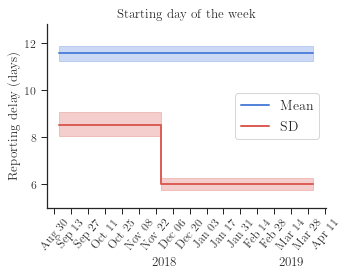

In [42]:
fig, ax = plt.subplots(1)
fig.set_size_inches(5,3.75)

delaymean_p = ss.scoreatpercentile(sampling_trj['delaymean'],[50,2.5,97.5],axis=0)
delayCV_p = ss.scoreatpercentile(sampling_trj['delayCV'],[50,2.5,97.5],axis=0)
delaysd_p = ss.scoreatpercentile(sampling_trj['delaysd'],[50,2.5,97.5],axis=0)

# ax2 = ax.twinx()
lns1 = ax.step(df0_['date'],delaymean_p[0],lw=2,c=clrs2[6],label='Mean',where='post');
ax.fill_between(df0_['date'],delaymean_p[1], delaymean_p[2], color=clrs2[6], alpha=.3, step='post')
lns2 = ax.step(df0_['date'],delaysd_p[0],lw=2,c=clrs2[0],label='SD',where='post');
ax.fill_between(df0_['date'], delaysd_p[1],delaysd_p[2],color=clrs2[0], alpha=.3, step='post')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=14))
ax.set_ylim(5,12.8); 
# ax2.set_ylim(34,95);
ax.set_ylabel("Reporting delay (days)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(loc=5, frameon=True)

ax.annotate('2019', (0,0), (232, -48), xycoords='axes fraction', 
            textcoords='offset points', va='top', fontsize=13)
ax.annotate('2018', (0,0), (105, -48), xycoords='axes fraction', 
            textcoords='offset points', va='top', fontsize=13)

ax.set_title("Starting day of the week");
fig.autofmt_xdate(rotation=50,ha="center")
plt.savefig("../figures/draft/Fig1e.pdf",format='pdf',bbox_inches='tight')

## Generating Fig 1

In [43]:
%%capture
%%bash
filename=Fig1
pdflatex <<TeXScript
\documentclass{standalone}
\usepackage{tikz,graphicx}
\usepackage[T1]{fontenc}

\begin{document}
\begin{tikzpicture}
    \node[anchor=north west] at (-3.15in,4.15in) {\includegraphics{../figures/draft/Fig1ab.pdf}};
    \node[anchor=north east] at (-.5in,-.3in) {\includegraphics{../figures/draft/Fig1c.pdf}};
    \node[anchor=north west] at (-.55in,-.12in) {\includegraphics{../figures/draft/Fig1d.pdf}};
    \node[anchor=north west] at (2.9in,.05in) {\includegraphics{../figures/draft/Fig1e.pdf}};
    \node[anchor=south east] at (-3in,4.1in) {\Large {\bf A}};
    \node[anchor=south west] at (2.25in,4.1in) {\Large {\bf B}};
    \node[anchor=south east] at (-3in,-.2in) {\Large {\bf C}};
    \node[anchor=south west] at (2.76in,-.2in) {\Large {\bf D}};
\end{tikzpicture}
\end{document}
TeXScript
mv texput.pdf ../figures/${filename}.pdf
rm texput.*
convert -density 150 -trim ../figures/${filename}.pdf -quality 100 ../figures/pngs/${filename}.png

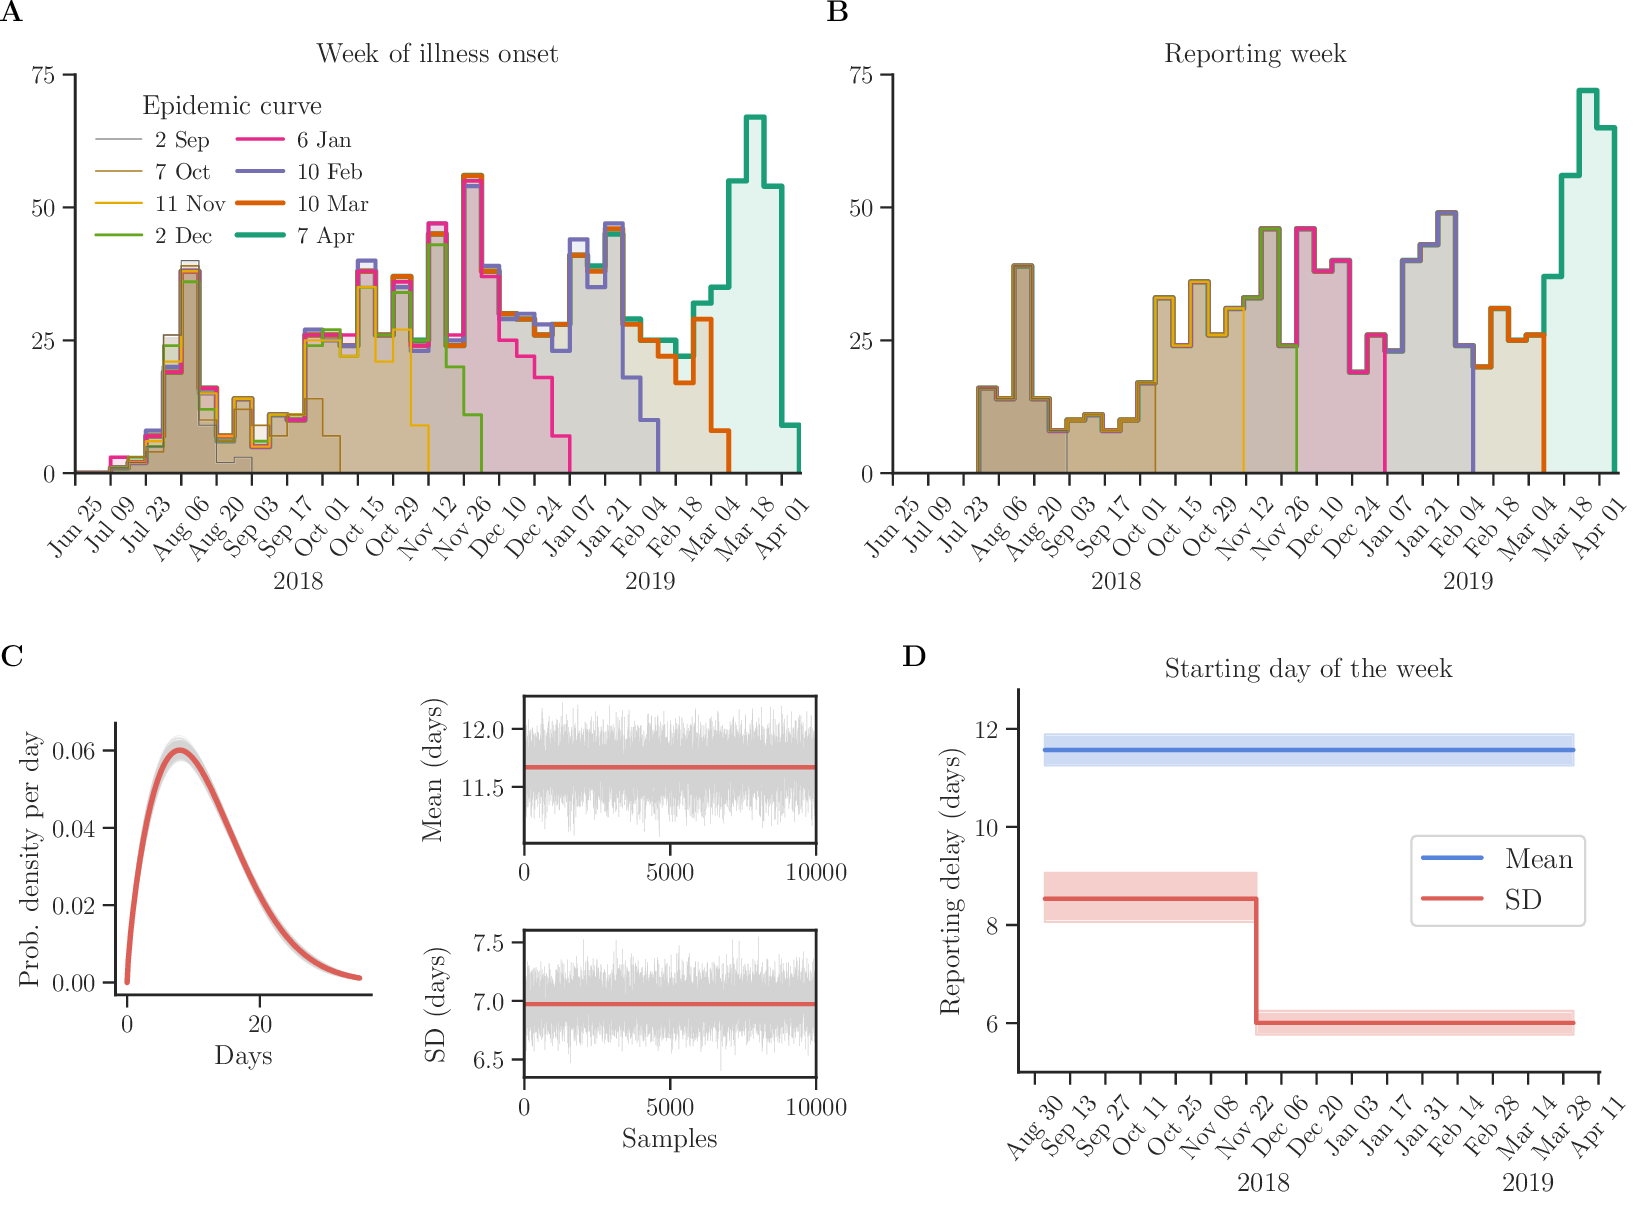

In [44]:
display(Image("../figures/pngs/Fig1.png", width="75%"))

## Now with respect to different epicurves

Calculation takes quite long time (~3 hours)

In [45]:
epicurves_to_forecast

0    2018-09-16
1    2018-09-23
2    2018-09-30
3    2018-10-07
4    2018-10-21
5    2018-10-28
6    2018-11-04
7    2018-11-11
8    2018-11-18
9    2018-11-25
10   2018-12-02
11   2018-12-16
12   2019-01-06
Name: epicurve, dtype: datetime64[ns]

In [46]:
%%capture --no-display
recalc=False
if(recalc):
    out = None
    for idx0,snapshot in enumerate(epicurves_to_forecast.values): 
        display(snapshot)
        df, df0 = make_df_and_df0(Df, snapshot)

        def makeModel(switchpoint):
            with pm.Model() as model:
                delaymean = pm.Flat('delaymean', testval=14.)
                k = pm.Flat('k', shape=2, testval=[1.5]*2)
                logθ = tt.log(delaymean/tt.gamma(1+1/k))

                weight = tt.switch(df['t'].values>=switchpoint, 1, 0)
                logθ_ = (1-weight)*logθ[0] + weight*logθ[1]
                k_ = (1-weight)*k[0] + weight*k[1]

                μ = df['confirmed'].values*\
                        (1-tt.exp(-tt.exp(k_*(df['logδt0'].values-logθ_))))/\
                        (1-tt.exp(-tt.exp(k_*(df['logδt'].values-logθ_))))
                pm.Poisson('likelihood', μ+0.001, observed=df['confirmed0'].values)

                loglks = tt.switch(tt.eq(μ,0), 0, df['confirmed0'].values*tt.log(μ)-μ-tt.gammaln(df['confirmed0'].values+1))
                loglk = pm.Deterministic('loglk',loglks.sum(0))
                pm.Deterministic('AIC',2*(4-loglk))

            return model

        for idx,sw in enumerate(df0['t'].values): 
            res = pm.find_MAP(model=makeModel(sw))
            res_ = pd.DataFrame({'switch_t': sw, 'AIC': float(res['AIC'])},
                         index=[df0['date'][idx]])
            dfMLE = dfMLE.append([res_]) if idx else res_

        dfMLE = dfMLE.sort_values(by='AIC')
        best_model = makeModel(dfMLE['switch_t'][0])
        print(best_model)
        with best_model:
            vorder = [best_model[v.var] for v in best_model.bijection.ordering.vmap]
            solMLE = pm.find_MAP()
            hess = pm.find_hessian(solMLE,vars=vorder)
            cov =  np.linalg.inv(hess)

        with pm.Model() as model_sampling:
            pars = pm.MvNormal('pars', mu=best_model.dict_to_array(solMLE), cov=np.diagflat(np.diag(cov)), shape=3)
            delaymean = pm.Deterministic('delaymean',pars[-1])
            k = pm.Deterministic('k',pars[:-1])
            θ = pm.Deterministic('θ',tt.exp(tt.log(delaymean)-tt.gammaln(1+1/k)))
            delayCV = pm.Deterministic('delayCV',tt.sqrt(tt.exp(tt.gammaln(1+2/k)-2*tt.gammaln(1+1/k))-1))
            delaysd = pm.Deterministic('delaysd',delayCV*delaymean)

            sampling = pm.sample_prior_predictive(10000)

        delaymean_p = ss.scoreatpercentile(sampling['delaymean'],[50,2.5,97.5],axis=0)
        k__0_p = ss.scoreatpercentile(sampling['k'][:,0],[50,2.5,97.5],axis=0)
        k__1_p = ss.scoreatpercentile(sampling['k'][:,1],[50,2.5,97.5],axis=0)
        delaysd__0_p = ss.scoreatpercentile(sampling['delaysd'][:,0],[50,2.5,97.5],axis=0)
        delaysd__1_p = ss.scoreatpercentile(sampling['delaysd'][:,1],[50,2.5,97.5],axis=0)
        delayCV__0_p = ss.scoreatpercentile(sampling['delayCV'][:,0],[50,2.5,97.5],axis=0)
        delayCV__1_p = ss.scoreatpercentile(sampling['delayCV'][:,1],[50,2.5,97.5],axis=0)
        res = pd.DataFrame({'delaymean': delaymean_p, 'k__0': k__0_p, 'k__1': k__1_p,
                           'delaysd__0': delaysd__0_p, 'delaysd__1': delaysd__1_p, 
                           'delayCV__0': delayCV__0_p, 'delayCV__1': delayCV__1_p}, 
                     index=['median','p2.5','p97.5']).T

        res['epicurve'] = snapshot
        res['loglk'] = solMLE['loglk']
        res['AIC'] = solMLE['AIC']
        res['switch_t'] = dfMLE['switch_t'][0]
        res['switch'] = t0+np.timedelta64(int(dfMLE['switch_t'][0]),'D')
        display(res)

        out = res if idx0==0 else pd.concat([out,res])

    out_one_switch = out
    out_one_switch.to_csv("../results/out_one_switch_01.csv")
else:
    out_one_switch = pd.read_csv("../results/out_one_switch_01.csv").rename(columns={'Unnamed: 0': 'index'}).set_index('index')
    out_one_switch['epicurve'] = pd.to_datetime(out_one_switch['epicurve'],format="%Y-%m-%d")

out_one_switch.iloc[-5:]

,median,p2.5,p97.5,epicurve,loglk,AIC,switch_t,switch
index,,,,,,,,
k__1,2.016923,1.952051,2.081339,2019-04-07,-4707.839099,9423.678199,210,2018-11-26
delaysd__0,8.525311,8.059288,9.034898,2019-04-07,-4707.839099,9423.678199,210,2018-11-26
delaysd__1,6.001320,5.768752,6.240403,2019-04-07,-4707.839099,9423.678199,210,2018-11-26
delayCV__0,0.736914,0.701859,0.776122,2019-04-07,-4707.839099,9423.678199,210,2018-11-26
delayCV__1,0.518775,0.504316,0.534272,2019-04-07,-4707.839099,9423.678199,210,2018-11-26


In [47]:
out_one_switch_01 = out_no_switch.loc['delaymean',['epicurve','AIC']].reset_index(drop=True).rename(columns={'AIC': 'AIC0'})\
    .merge(out_one_switch.reset_index(),on='epicurve',how='right').set_index('index')
out_one_switch_01.loc[out_one_switch_01['AIC']<out_one_switch_01['AIC0']]

,epicurve,AIC0,median,p2.5,p97.5,loglk,AIC,switch_t,switch
index,,,,,,,,,
delaymean,2018-09-09,207.709710,26.061356,-45.503085,9.552158e+01,-92.974910,193.949820,112,2018-08-20
k__0,2018-09-09,207.709710,0.336002,0.011732,6.593115e-01,-92.974910,193.949820,112,2018-08-20
k__1,2018-09-09,207.709710,1.717954,1.106838,2.319576e+00,-92.974910,193.949820,112,2018-08-20
delaysd__0,2018-09-09,207.709710,107.804871,-948.136278,2.882013e+23,-92.974910,193.949820,112,2018-08-20
delaysd__1,2018-09-09,207.709710,15.704219,-28.694210,6.225001e+01,-92.974910,193.949820,112,2018-08-20
delayCV__0,2018-09-09,207.709710,4.291976,1.568056,1.183819e+25,-92.974910,193.949820,112,2018-08-20
delayCV__1,2018-09-09,207.709710,0.599724,0.457596,9.047372e-01,-92.974910,193.949820,112,2018-08-20
delaymean,2018-09-16,283.886957,9.274281,6.637031,1.188360e+01,-137.628032,283.256063,119,2018-08-27
k__0,2018-09-16,283.886957,0.924998,-0.070173,1.904647e+00,-137.628032,283.256063,119,2018-08-27


# Nowcasting

In [48]:
df, df0 = make_df_and_df0(Df, max(Df['epicurve']))

first_nonzero_count = df.iloc[df.confirmed0.to_numpy().nonzero()[0]].date.min()
first_nonzero_count

Timestamp('2018-07-09 00:00:00')

In [49]:
epicurves_to_nowcast

0   2018-10-07
1   2018-11-11
2   2018-12-02
3   2019-01-06
Name: epicurve, dtype: datetime64[ns]

In [50]:
sw_to_nowcast = out_one_switch_01.loc[out_one_switch_01.epicurve.isin(epicurves_to_nowcast),['epicurve','switch_t']]\
    .loc['delaymean'].reset_index(drop=True)
sw_to_nowcast

,epicurve,switch_t
0,2018-10-07,147
1,2018-11-11,140
2,2018-12-02,189
3,2019-01-06,189


Gamma distribution function for generation interval

In [51]:
def pgamma_np(delay_mean, delay_sd, timestep, size):
    taus = np.arange(1,size+1)*timestep
    res = gammainc((delay_mean/delay_sd)**2, delay_mean*taus/(delay_sd**2))
    return np.append([res[0]],res[1:]-res[:-1])

@as_op(itypes=[tt.dscalar, tt.dscalar, tt.dscalar, tt.lscalar], otypes=[tt.dvector])
def pgamma(delay_mean, delay_sd, timestep, size):
    taus = np.arange(1,size+1)*timestep
    res = gammainc((delay_mean/delay_sd)**2, delay_mean*taus/(delay_sd**2))
    return np.append([res[0]],res[1:]-res[:-1])

# example
delaymean = theano.shared(np.dtype('float64').type(10.0))
delaysd = theano.shared(np.dtype('float64').type(2.0))
timestep = theano.shared(np.dtype('float64').type(7.0))
τlength = theano.shared(np.dtype('int64').type(7))
res = pgamma(delaymean,delaysd,timestep,τlength).eval()

res

array([5.31763039e-02, 9.14449586e-01, 3.23653067e-02, 8.80290580e-06,
       1.84825710e-10, 8.88178420e-16, 0.00000000e+00])

In [52]:
def makeNowcasting(df,df0,switchpoint):
    with pm.Model() as model:
        # should be flat priors, where testval are initial conditions for optim-function
        delaymean = pm.Flat('delaymean', testval=12.)
        k = pm.Flat('k', shape=2, testval=[2.25,2.75])
        logθ = tt.log(delaymean/tt.gamma(1+1/k))

        # implementing the switching point
        weight = tt.switch(df['t'].values>=switchpoint, 1, 0)
        logθ_ = (1-weight)*logθ[0] + weight*logθ[1]
        k_ = (1-weight)*k[0] + weight*k[1]

        delay0 = (1-tt.exp(-tt.exp(k_*(df['logδt0'].values-logθ_))))
        delay = (1-tt.exp(-tt.exp(k_*(df['logδt'].values-logθ_))))
        μ = df['confirmed'].values*\
                (1-tt.exp(-tt.exp(k_*(df['logδt0'].values-logθ_))))/\
                (1-tt.exp(-tt.exp(k_*(df['logδt'].values-logθ_))))
        pm.Poisson('likelihood', μ+0.001, observed=df['confirmed0'].values)
        
        vorder = [model[v.var] for v in model.bijection.ordering.vmap]
        solMLE = pm.find_MAP()
        hess = pm.find_hessian(solMLE,vars=vorder)
        cov =  np.linalg.inv(hess)
        
    with pm.Model() as model_sampling:
        pars = pm.MvNormal('pars', mu=model.dict_to_array(solMLE), cov=np.diagflat(np.diag(cov)), shape=3)
        logdelaymean = tt.log(pars[-1])
        k = pars[:-1]
        logθ = logdelaymean - tt.log(tt.gamma(1+1/k))
        
        # implementing the switching point
        weight = tt.switch(df0['t'].values>=switchpoint, 1, 0)
        logθ_ = (1-weight)*logθ[0] + weight*logθ[1]
        k_ = (1-weight)*k[0] + weight*k[1]
        
        ### Nowcasting
        delay0 = 1 - tt.exp(-tt.exp(k_*(df0['logδt'].values-logθ_)))
        μ = tt.switch((df0['confirmed'].values>0)&(delay0<1-0.001),df0['confirmed'].values*(1.0-delay0)/delay0,0.001)
        α = tt.switch((df0['confirmed'].values>0)&(delay0<1-0.001),df0['confirmed'].values/(1.0-delay0),0.001)
        unconfirmed = pm.NegativeBinomial('unconfirmed', mu = μ, alpha = α, shape = df0.shape[0])
               
        # total number of cases (confirmed unreported + confirmed reported + probable)
        reported = shared(df0['confirmed'].values)
        predicted = pm.Deterministic('predicted',unconfirmed+reported)
            
        ### Reproduction number
        # generation time
        gtmean = shared(np.dtype('float64').type(15.3))
        gtsd = shared(np.dtype('float64').type(9.1))
        timestep = shared(np.dtype('float64').type(7.0)) ## weekly data
        gt = pgamma(gtmean,gtsd,timestep,reported.shape[0]) 
        # convolution with predicted
        predicted_gt_conv = [0,predicted[0]*gt[0]]
        for idx in np.arange(1,df0.shape[0]-1):
            predicted_gt_conv.append(tt.dot(predicted[idx::-1],gt[:(idx+1)]))
        predicted_gt_conv = tt.stack(predicted_gt_conv)
        Reff = pm.Deterministic('Reff',predicted/predicted_gt_conv)
        
        # convolution with reported
        reported_gt_conv = [0,reported[-1]*gt[0]]
        for idx in np.arange(1,df0.shape[0]-1):
            reported_gt_conv.append(tt.dot(reported[idx::-1],gt[:(idx+1)]))
        reported_gt_conv = tt.stack(reported_gt_conv)
        Reff_reported = pm.Deterministic('Reff_reported',reported/reported_gt_conv)
        
        sampling = pm.sample_prior_predictive(10000)
        
    return(sampling)

logp = -1,121.8, ||grad|| = 0.021507: 100%|██████████| 14/14 [00:00<00:00, 2381.97it/s]  


,RMSE_abs,RMSE_rel,log_score,avr_score,bias,logp,AIC,AICc,coverage_all,coverage
2018-10-07,20.116328,0.251651,-3.489117,0.030528,0.079181,-34.675244,77.350489,57.350489,1/3,No


array([[        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                inf, 17.63103259,  4.64142284, 13.0755852 ,  5.80199621,
         0.58015611,  0.2640588 ,  0.66126285,  0.67092008,  0.60168136,
         1.09313021,  1.44283103,  2.2040368 ],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                inf, 17.63103259,  4.64142284, 13.0755852 ,  5.80199621,
         0.58015611,  0.2640588 ,  0.66126285,  0.67092008,  0.61061189,
         1.11193208,  1.49703724,  3.99406037],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                inf, 17.63103259,  4.64142284, 13.0755852 ,  5.80199621,
         0.58015611,  0.2640588 ,  0.66126285,  0.67092008,  0.61061189,
         1.19250569,  1.5476

logp = -3,331, ||grad|| = 133.11: 100%|██████████| 11/11 [00:00<00:00, 3025.20it/s]


,RMSE_abs,RMSE_rel,log_score,avr_score,bias,logp,AIC,AICc,coverage_all,coverage
2018-11-11,9.678154,0.132373,-1.284116,0.276895,0.033858,-56.764061,121.528121,101.528121,3/3,Yes


array([[        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                inf, 11.75402172,  8.67490569, 10.61997028,  6.01271837,
         0.95624089,  0.31592362,  0.72700862,  0.33347234,  0.89891308,
         1.09633941,  2.50403408,  1.95297888,  1.21993616,  1.64827818,
         0.85837342,  1.23501319,  0.7772265 ],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                inf, 11.75402172,  8.67490569, 10.61997028,  6.01271837,
         0.95624089,  0.31592362,  0.72700862,  0.33347234,  0.89891308,
         1.09633941,  2.50403408,  1.95297888,  1.21993616,  1.64827818,
         0.89924835,  1.39547731,  1.16653426],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                inf, 11.7540

logp = -3,972.5, ||grad|| = 2.0846: 100%|██████████| 16/16 [00:00<00:00, 2759.98it/s]  


,RMSE_abs,RMSE_rel,log_score,avr_score,bias,logp,AIC,AICc,coverage_all,coverage
2018-12-02,17.339742,0.191561,-3.318378,0.036212,0.054358,-43.017356,94.034712,74.034712,1/3,Yes


array([[        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                inf, 17.63103259,  5.80177855, 11.11835217,  5.34691329,
         0.73721886,  0.27736746,  0.78283188,  0.43550595,  0.93949226,
         1.09354325,  2.37558624,  2.12430831,  1.21807398,  1.61294405,
         1.05358796,  1.23153197,  0.86415633,  1.52416249,  0.70730039,
         0.48935278],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                inf, 17.63103259,  5.80177855, 11.11835217,  5.34691329,
         0.73721886,  0.27736746,  0.78283188,  0.43550595,  0.93949226,
         1.09354325,  2.37558624,  2.12430831,  1.21807398,  1.61294405,
         1.05358796,  1.23153197,  0.89872259,  1.6314368 ,  0.80887211,
         0.64668527],
       [        nan,         nan,         nan,         nan,         nan,
       

logp = -6,444.5, ||grad|| = 3.7009: 100%|██████████| 16/16 [00:00<00:00, 2386.60it/s]  


,RMSE_abs,RMSE_rel,log_score,avr_score,bias,logp,AIC,AICc,coverage_all,coverage
2019-01-06,4.966555,0.089202,-0.929487,0.394756,-0.047425,-22.747957,53.495913,33.495913,3/3,Yes


array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               inf, 3.91800724, 5.02032369, 7.15588912, 5.76362772,
        1.04217237, 0.31822948, 0.7208734 , 0.32978071, 0.89192283,
        0.99230709, 2.64447506, 2.05913546, 1.4204605 , 1.69719713,
        0.97972018, 1.2147419 , 0.78598758, 1.53239216, 0.81064921,
        1.5887801 , 0.9992275 , 0.60037608, 0.57419304, 0.62913948,
        0.37628041],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               inf, 3.91800724, 5.02032369, 7.15588912, 5.76362772,
        1.04217237, 0.31822948, 0.7208734 , 0.32978071, 0.89192283,
        0.99230709, 2.64447506, 2.05913546, 1.4204605 , 1.69719713,
        0.97972018, 1.2147419 , 0.78598758, 1.53239216, 0.81064921,
        1.59662791, 1.00879936, 0.62418382, 0.62362291, 0.73280283,
        0.54635709],
      

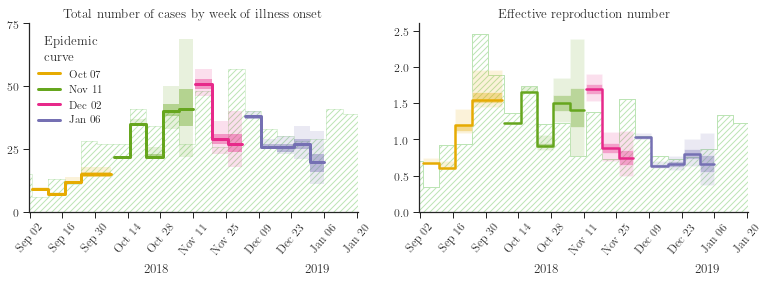

In [53]:
horizon = 3

epicurve0 = epicurves[0]

n_starting_epicurve = 2
clrs = epicurves_clrs[::-1][n_starting_epicurve:]

fig, axs = plt.subplots(1,2,sharex=True)
fig.set_size_inches(11,4.25)

xmin = pd.to_datetime("2018-09-02",format="%Y-%m-%d")
xmax = max(epicurves_to_nowcast)+np.timedelta64(2,'W')
tmin = xmin

clr0_ = sns.color_palette("Greens", 6)[1]
epicurve0 = max(Df['epicurve'])
df0 = Df.loc[Df['epicurve']==epicurve0].copy()
df0['total'] = df0.confirmed+df0.probable
df0_ = df0.copy()

dts = df0['date'].values
dts = np.append(dts,[df0.epicurve[-1:].values])
dfp_total = np.append(df0.total,[df0.total[-1:].get_values()])
axs[0].step(dts,dfp_total,lw=.5,where='post',label="_nolegend_",zorder=1,color=clr0_);
axs[0].fill_between(dts, dfp_total, edgecolor=clr0_, facecolor='none', zorder=1, 
                    hatch = '////', lw=0, step='post', label='_nolegend_')

### Reproduction number
# generation time
gtmean = 15.3; gtsd = 9.3;
reported = df0['total'].values
gt = pgamma_np(gtmean,gtsd,7.0,df0.shape[0])
# convolution with reported
reported_gt_conv = [0,reported[-1]*gt[0]]
for idx in np.arange(1,df0.shape[0]-1):
    reported_gt_conv.append(np.dot(reported[idx::-1],gt[:(idx+1)]))
Reff_reported = reported/reported_gt_conv
Reff_reported = np.r_[Reff_reported,Reff_reported[-1:]]

axs[1].step(dts,Reff_reported,lw=.5,where='post',label="_nolegend_",zorder=1,color=clr0_);
axs[1].fill_between(dts, Reff_reported, edgecolor=clr0_, facecolor='none', zorder=1,
                    hatch = '////', step='post', label='_nolegend_')
_, Df0_ = make_df_and_df0(Df, epicurves[0])
df_nowcasting = None
for idx in sw_to_nowcast.index: #
    snapshot = sw_to_nowcast.loc[idx,'epicurve']
    df, df0 = make_df_and_df0(Df, snapshot)

    first_nonzero_count = df.iloc[df.confirmed0.to_numpy().nonzero()[0]].date.min()
    ppc_nowcasting = makeNowcasting(df,df0,sw_to_nowcast.loc[idx,'switch_t'])
    Df0 = Df0_.loc[Df0_['date']<=snapshot]
    ## FluSight score
    x_ = ppc_nowcasting['predicted']-Df0['confirmed'].values
    x_ = (x_>=-log_score_threshold)&(x_<=log_score_threshold)
    log_score = (np.log(np.sum(x_,0)/len(ppc_nowcasting['predicted'])))[-horizon:]
    log_score = np.mean(log_score)
    avr_score = np.exp(log_score)
    pXX = np.percentile(ppc_nowcasting['predicted'],[2.5,50,97.5],axis=0)
    p50 = pXX[1]
    error_abs = p50-Df0['confirmed'].values
    error = np.log(p50/Df0['confirmed'].values)/np.log(10)
    logp = Df0['confirmed']*np.log(p50)-p50-[lgamma(x+1) for x in Df0['total']]
    coverage = ((Df0['confirmed']>=pXX[0])&(Df0['confirmed']<=pXX[-1]))
    nparams = 4
    nsamplesize = len(logp[-horizon:])
    logp = sum(logp[-horizon:])
    AICc = 2*(nparams-logp)+2*(nparams**2+nparams)/(nsamplesize-nparams-1)
    AIC = 2*(nparams-logp)
    df_nowcasting_ = pd.DataFrame({'RMSE_abs': np.sqrt(np.mean(error_abs[-horizon:]**2)),
                                   'RMSE_rel': np.sqrt(np.mean(error[-horizon:]**2)),
                                   'log_score': log_score,
                                   'avr_score': avr_score,
                                   'bias': np.median(error[-horizon:]), 
                                   'logp': logp,
                                   'AIC': AIC,
                                   'AICc': AICc,
                                   'coverage_all': '%d/%d'%(coverage[-horizon:].sum(),horizon),
                                   'coverage': 'Yes' if coverage.iloc[-2] else 'No'},
                                 index=[snapshot])
    display(df_nowcasting_)
    df_nowcasting = pd.concat([df_nowcasting,df_nowcasting_])
    
    ## Plots
    clr = clrs[idx]
    # dates
    dts = df0['date'].values
    # percentiles of predicted values
    dfp = ss.scoreatpercentile(ppc_nowcasting['predicted'],[2.5,25,50,75,97.5],axis=0)

    # Reff
    dfp_Reff = ss.scoreatpercentile(ppc_nowcasting['Reff'],[2.5,25,50,75,97.5],axis=0)
    display(dfp_Reff)
    # next line is technical in order to show the additional step at the end
    dfp_Reff_reported = ss.scoreatpercentile(ppc_nowcasting['Reff_reported'],[50],axis=0)
    dfp_Reff_reported = np.c_[dfp_Reff_reported,dfp_Reff_reported[-1:]]
    
    dfp = dfp[:,np.isin(dts,df.date[:-1])]
    dfp_Reff = dfp_Reff[:,np.isin(dts,df.date[:-1])]
    dts = dts[np.isin(dts,df.date[:-1])]
    
    # next lines are technical in order to show the additional step at the end
    dfp = np.c_[dfp,dfp[:,-1]]
    dfp_Reff = np.c_[dfp_Reff,dfp_Reff[:,-1]]
    dts = np.append(dts,[df0.epicurve[-1:].values])

    # time constraints for nice plots
    tmin_ = tmin-np.timedelta64(2,'D') 
    dfp = [_[pd.to_datetime(dts)>=tmin_] for _ in dfp]
    dfp_Reff = [_[pd.to_datetime(dts)>=tmin_] for _ in dfp_Reff] 
    dts = dts[pd.to_datetime(dts)>=tmin_]
    
    ax = axs[0]
    ax.step(dts,dfp[2],lw=3,where='post',color=clr,label=snapshot.strftime('%b %d'),zorder=3);
    ax.fill_between(dts,dfp[0],dfp[-1],facecolor=clr, alpha=.15, edgecolor='none', zorder=2,
                    step='post',label="_nolegend_")
    ax.fill_between(dts,dfp[1],dfp[-2],facecolor=clr, alpha=.4, edgecolor='none',zorder=2, 
                    step='post',label="_nolegend_")
    
    ax = axs[1]
    ax.step(dts,dfp_Reff[2],lw=2.5,where='post',color=clr,label=snapshot.strftime('%b %d'),zorder=3);
    ax.fill_between(dts, dfp_Reff[0], dfp_Reff[-1],facecolor=clr, alpha=.15, step='post', label='_nolegend_',zorder=2)
    ax.fill_between(dts,dfp_Reff[1],dfp_Reff[-2],facecolor=clr, alpha=.35, step='post', label="_nolegend_",zorder=2)
    
    tmin = snapshot
    
##!
ax = axs[0]
ax.set_title("Total number of cases by week of illness onset")
ax.set_ylim(0,75)
ax.set_yticks(np.arange(0,100,25))
# ax.legend(loc=2)
ax.legend(fontsize=11, loc=2, ncol=1, title="Epidemic\ncurve", frameon=False, prop={'size': 11})

ax = axs[1]
xtks = pd.date_range(start=xmin,end=xmax,freq='1D')[::14]
ax.set_xticks(xtks)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_title("Effective reproduction number")
ax.set_ylim(0,2.6)
# ax.legend(loc=1)
for idx in range(2):
    axs[idx].set_xlim(xmin-np.timedelta64(12,'h'),xmax+np.timedelta64(12,'h'))
    axs[idx].annotate('2019', (0,0), (276, -50), xycoords='axes fraction', 
                      textcoords='offset points', va='top', fontsize=13)
    axs[idx].annotate('2018', (0,0), (115, -50), xycoords='axes fraction', 
                      textcoords='offset points', va='top', fontsize=13)
    axs[idx].spines['right'].set_visible(False)
    axs[idx].spines['top'].set_visible(False)
    
fig.autofmt_xdate(rotation=50, ha='center')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../figures/draft/Fig2.pdf",format='pdf',bbox_inches='tight')

In [54]:
df_nowcasting.round(1).to_csv("../tables/Table2.csv")

## Generating Fig 2

In [55]:
%%capture
%%bash
pdflatex <<TeXScript
\documentclass{standalone}
\usepackage{tikz,graphicx}
\usepackage[T1]{fontenc}

\begin{document}
\begin{tikzpicture}
    \node[anchor=north west] {\includegraphics{../figures/draft/Fig2.pdf}};
    \node[anchor=south east] at (0.2in,-0.2in) {\Large {\bf A}};
    \node[anchor=south west] at (5.35in,-0.2in) {\Large {\bf B}};
\end{tikzpicture}
\end{document}
TeXScript
filename=Fig2
mv texput.pdf ../figures/${filename}.pdf
rm texput.*
convert -density 150 -trim ../figures/${filename}.pdf -quality 100 ../figures/pngs/${filename}.png

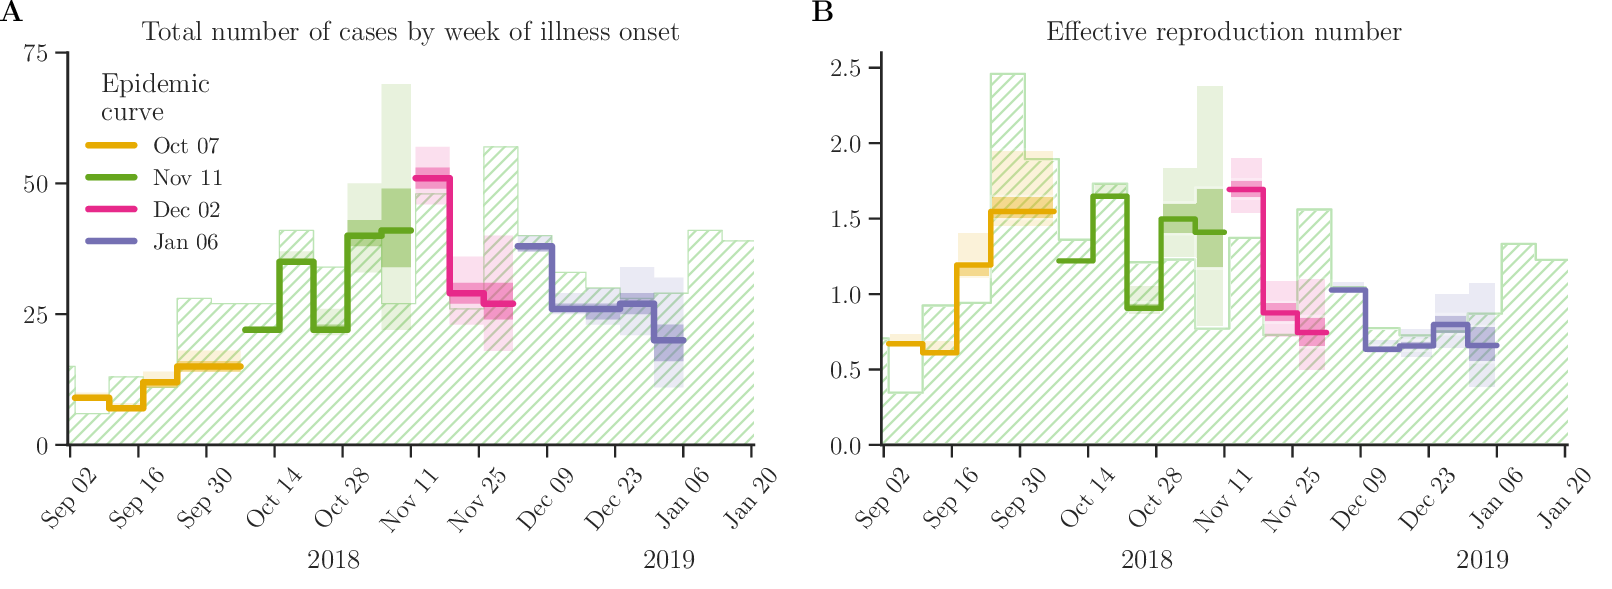

In [56]:
display(Image("../figures/pngs/Fig2.png", width="75%"))

# <font color="orange">Forecasting</font>

Some part has been already done in **Initialization.ipynb** module

In [57]:
sw_to_forecast = out_one_switch_01.loc[:,['epicurve','switch_t']].reset_index(drop=True).drop_duplicates()
sw_to_forecast = pd.concat([sw_to_forecast,pd.DataFrame({
    'epicurve': out_no_switch.loc[~out_no_switch['epicurve'].isin(sw_to_forecast['epicurve']),'epicurve'].values,
    'switch_t': -1}).drop_duplicates()])
sw_to_forecast.sort_values('epicurve', inplace=True)
sw_to_forecast = sw_to_forecast.reset_index(drop=True)

sw_to_forecast = sw_to_forecast.loc[sw_to_forecast.epicurve.isin(df_reported.epicurve)].reset_index(drop=True)
sw_to_forecast = sw_to_forecast.loc[lambda d: d.epicurve<=xmx_for_forecast]
sw_to_forecast

,epicurve,switch_t
0,2018-09-02,-1
1,2018-09-09,112
2,2018-09-16,119
3,2018-09-23,112
4,2018-09-30,133
5,2018-10-07,147
6,2018-10-21,147
7,2018-10-28,147
8,2018-11-04,147
9,2018-11-11,140


In [58]:
@as_op(itypes=[tt.dscalar, tt.dscalar, tt.lvector], otypes=[tt.dmatrix])
def probs_for_projection_no_switch(θ, k, τs):
    τs_to_forecast = τs[τs<=0]
    
    res = np.array([],dtype=np.float64).reshape(0,τs_to_forecast.shape[0])
    for τ in τs[τs>0]:
        res0 = 1-np.exp(-((τ-τs_to_forecast)/θ)**k)
        res0 = np.r_[np.diff(res0),1-res0[-1]]
        res = np.vstack([res,res0])
    return res

@as_op(itypes=[tt.dvector, tt.dvector, tt.lvector], otypes=[tt.dmatrix])
def probs_for_projection(θ_, k_, τs):
    τs_to_forecast = τs[τs<=0]
    
    res = np.array([],dtype=np.float64).reshape(0,τs_to_forecast.shape[0])
    for τ in τs[τs>0]:
        # res0 = 1-np.exp(-((τ-τs_to_forecast)/θ_)**k_) # does not work
        res0 = [1-np.exp(-((τ-τs_to_forecast[j])/θ_[j])**k_[j]) for j in range(τs_to_forecast.shape[0])]
        res0 = np.r_[np.diff(res0),1-res0[-1]]
        res = np.vstack([res,res0])
    return res

# illustrative example
θ__ = shared(np.dtype('float64').type(13.1))
k__ = shared(np.dtype('float64').type(1.5))
τs__ = df_for_forecast_reported.τ.get_values()
res = probs_for_projection_no_switch(θ__,k__,shared(τs__)).eval()

# first four columns are probabilities to get reported in forecasting window, 
# the last column is to get reported later
res

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.66133815e-16, 0.00000000e+00, 0.00000000e+00],
       [8.21565038e-15, 6.66133815e-16, 0.00000000e+00],
       [1.02029496e-13, 8.21565038e-15, 6.66133815e-16],
       [1.17605925e-12, 1.02029496e-13, 8.88178420e-15],
       [1.26169075e-11, 1.17605

In [59]:
sw_to_forecast_and_study = sw_to_forecast[2:].reset_index(drop=True)
sw_to_forecast_and_study

,epicurve,switch_t
0,2018-09-16,119
1,2018-09-23,112
2,2018-09-30,133
3,2018-10-07,147
4,2018-10-21,147
5,2018-10-28,147
6,2018-11-04,147
7,2018-11-11,140
8,2018-11-18,189
9,2018-11-25,189


In [60]:
sw_to_forecast_and_to_plot = sw_to_forecast_and_study.iloc[[0,3,5,9,11,12]]
sw_to_forecast_and_to_plot

,epicurve,switch_t
0,2018-09-16,119
3,2018-10-07,147
5,2018-10-28,147
9,2018-11-25,189
11,2018-12-16,189
12,2019-01-06,189


## By lower boundary

In [61]:
recalc=False
if (recalc):
    def makeForecasting(df,df0,switchpoint):
        if switchpoint<0: #no switchpoint
            with pm.Model() as model:
                # should be flat priors, where testval are initial conditions for optim-function
                delaymean = pm.Flat('delaymean', testval=14.)
                k = pm.Flat('k', shape=1, testval=1.5)
                logθ = tt.log(delaymean/tt.gamma(1+1/k))

                μ = df['confirmed'].values*\
                        (1-tt.exp(-tt.exp(k*(df['logδt0'].values-logθ))))/\
                        (1-tt.exp(-tt.exp(k*(df['logδt'].values-logθ))))
                pm.Poisson('likelihood', μ+0.001, observed=df['confirmed0'].values)

                vorder = [model[v.var] for v in model.bijection.ordering.vmap]
                solMLE = pm.find_MAP()
                hess = pm.find_hessian(solMLE,vars=vorder)
                cov =  np.linalg.inv(hess)

            with pm.Model() as model_sampling:
                pars = pm.MvNormal('pars', mu=model.dict_to_array(solMLE), cov=np.diagflat(np.diag(cov)), shape=2)
                logdelaymean = tt.log(pars[-1])
                k = pars[0]
                logθ = logdelaymean - tt.log(tt.gamma(1+1/k))

                ### Nowcasting
                delay0 = 1 - tt.exp(-tt.exp(k*(df0['logδt'].values-logθ)))
                μ = tt.switch((df0['confirmed'].values>0)&(delay0<1-0.001),df0['confirmed'].values*(1.0-delay0)/delay0,0.001)
                α = tt.switch((df0['confirmed'].values>0)&(delay0<1-0.001),df0['confirmed'].values/(1.0-delay0),0.001)
                unconfirmed = pm.NegativeBinomial('unconfirmed', mu = μ, alpha = α, shape = df0.shape[0])

                # total number of cases (confirmed unreported + confirmed reported + probable)
                reported = shared(df0['total'].values)
                predicted = pm.Deterministic('predicted',unconfirmed+reported)

                ## forecasting
                dts = np.append(df0.date,df0.epicurve[:1])
                dts = np.append(dts,dts_epicurves[pd.to_datetime(dts_epicurves)>snapshot][:forecasting_window])
                τs = np.array((snapshot-pd.to_datetime(dts)).astype('timedelta64[D]'),dtype='int64') 
                probs = pm.Deterministic('probs',probs_for_projection_no_switch(tt.exp(logθ),k,shared(τs)))
                forecasted = pm.Multinomial('forecasted', unconfirmed, probs+0.001,\
                                            shape=(df0.confirmed[df0.date<snapshot].get_values().shape[0],forecasting_window+1))
                forecast = pm.Deterministic('forecast', forecasted.sum(0)[:-1])
                
                sampling = pm.sample_prior_predictive(10000)
        else: #with a switchpoint
            with pm.Model() as model:
                # should be flat priors, where testval are initial conditions for optim-function
                delaymean = pm.Flat('delaymean', testval=14.)
                k = pm.Flat('k', shape=2, testval=[1.5]*2)
                logθ = tt.log(delaymean/tt.gamma(1+1/k))

                # implementing the switching point
                weight = tt.switch(df['t'].values>=switchpoint, 1, 0)
                logθ_ = (1-weight)*logθ[0] + weight*logθ[1]
                k_ = (1-weight)*k[0] + weight*k[1]

                μ = df['confirmed'].values*\
                        (1-tt.exp(-tt.exp(k_*(df['logδt0'].values-logθ_))))/\
                        (1-tt.exp(-tt.exp(k_*(df['logδt'].values-logθ_))))
                pm.Poisson('likelihood', μ+0.001, observed=df['confirmed0'].values)

                vorder = [model[v.var] for v in model.bijection.ordering.vmap]
                solMLE = pm.find_MAP()
                hess = pm.find_hessian(solMLE,vars=vorder)
                cov =  np.linalg.inv(hess)

            with pm.Model() as model_sampling:
                pars = pm.MvNormal('pars', mu=model.dict_to_array(solMLE), cov=np.diagflat(np.diag(cov)), shape=3)
                logdelaymean = tt.log(pars[-1])
                k = pars[:-1]
                logθ = logdelaymean - tt.log(tt.gamma(1+1/k))

                # implementing the switching point
                weight = tt.switch(df0['t'].values>=switchpoint, 1, 0)
                logθ_ = (1-weight)*logθ[0] + weight*logθ[1]
                k_ = (1-weight)*k[0] + weight*k[1]

                ### Nowcasting
                delay0 = 1 - tt.exp(-tt.exp(k_*(df0['logδt'].values-logθ_)))
                μ = tt.switch((df0['confirmed'].values>0)&(delay0<1-0.001),df0['confirmed'].values*(1.0-delay0)/delay0,0.001)
                α = tt.switch((df0['confirmed'].values>0)&(delay0<1-0.001),df0['confirmed'].values/(1.0-delay0),0.001)
                unconfirmed = pm.NegativeBinomial('unconfirmed', mu = μ, alpha = α, shape = df0.shape[0])

                # total number of cases (confirmed unreported + confirmed reported)
                reported = shared(df0['confirmed'].values)
                predicted = pm.Deterministic('predicted',unconfirmed+reported)

                ## forecasting
                dts = np.append(df0.date,df0.epicurve[:1])
                dts_t = np.append(df0.t,max(df0.t))
                dts = np.append(dts,dts_epicurves[pd.to_datetime(dts_epicurves)>snapshot][:forecasting_window])
                τs = np.array((snapshot-pd.to_datetime(dts)).astype('timedelta64[D]'),dtype='int64') 
                w = tt.switch(dts_t>=switchpoint, 1, 0)
                logθ__ = (1-w)*logθ[0] + w*logθ[1]
                k__ = (1-w)*k[0] + w*k[1]
                probs = pm.Deterministic('probs',probs_for_projection(tt.exp(logθ__),k__,shared(τs)))
                forecasted = pm.Multinomial('forecasted', unconfirmed, probs+0.001,\
                                            shape=(df0.loc[df0.date<snapshot].get_values().shape[0],forecasting_window+1))
                forecast = pm.Deterministic('forecast', forecasted.sum(0)[:-1])
                
                sampling = pm.sample_prior_predictive(10000)

        # in the next line it's ">" not ">=" because our reports for the number of cases in the previous week or so
        Df0 = df_forecast_reports.loc[pd.to_datetime(df_forecast_reports.date)>snapshot][:forecasting_window]
        pXX = ss.scoreatpercentile(sampling['forecast'],[2.5,50,97.5],axis=0)
        ## FluSight score
        x_ = (sampling['forecast']-Df0['reported'].values)
        x_ = (x_>=-log_score_threshold)&(x_<=log_score_threshold)
        log_score = np.log(np.sum(x_,0)/len(sampling['forecast']))
        avr_scores = np.exp(log_score)
        log_score = np.mean(log_score)
        avr_score = np.exp(log_score)
        ##
        p50 = pXX[1]
        logp = sum(Df0['reported']*np.log(p50)-p50-[lgamma(x+1) for x in Df0['reported']])
        nparams = 4 if switchpoint>=0 else 2
        nsamplesize = len(Df0['reported'].values)
        AICc = 2*(nparams-logp)+2*(nparams**2+nparams)/(nsamplesize-nparams-1)
        AIC = 2*(nparams-logp)
        error_abs = p50-Df0['reported'].values
        error = np.log(p50/Df0['reported'].values)/np.log(10)
        coverage = ((Df0['reported']>=pXX[0])&(Df0['reported']<=pXX[-1]))
        df_stats = pd.DataFrame({'RMSE_abs': np.sqrt(np.mean(error_abs**2)),
                                 'RMSE_rel': np.sqrt(np.mean(error**2)),
                                 'avr_score__1': avr_scores[0],
                                 'avr_score__2': avr_scores[1],
                                 'log_score': log_score,
                                 'avr_score': avr_score,
                                 'logp': logp,
                                 'AIC': AIC,
                                 'AICc': AICc,
                                 'bias': np.median(error),
                                 'coverage__1': 'Yes' if coverage.iloc[0] else 'No',
                                 'coverage__2': 'Yes' if coverage.iloc[-1] else 'No'},
                                index=[snapshot])
        display(df_stats)

        dfp_forecast = ss.scoreatpercentile(sampling['forecast'],[2.5,25,50,75,97.5],axis=0)
        # next two lines are technical in order to show the additional step at the end
        dfp_forecast = np.c_[dfp_forecast,dfp_forecast[:,-1]]
        dates_forecast = dts_epicurves[pd.to_datetime(dts_epicurves)>=snapshot][:(forecasting_window+1)]

        df_res = pd.DataFrame(dfp_forecast, index=['p2.5','p25','p50','p75','p97.5'], columns=dates_forecast).T.\
                    reset_index().rename(columns={'index':'date'})
        df_res['epicurve'] = snapshot
        cols = df_res.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        df_res = df_res[cols]

        return(df_res, df_stats, sampling['forecast'])
    
    out = None; out_stats = None
    for idx in sw_to_forecast_and_to_plot.index:
        snapshot = sw_to_forecast_and_to_plot.loc[idx,'epicurve']
        display(snapshot)
        df, df0 = make_df_and_df0(Df, snapshot)
        first_nonzero_count = df.iloc[df.confirmed0.to_numpy().nonzero()[0]].date.min()
        res, res_stats, trace = makeForecasting(df,df0,-1)
        with open('../results/traces/trace_noswitch-type0-npoints0-shift0-%s.pkl'%snapshot.strftime(format="%Y-%m-%d"), 'wb') as buff:
            pickle.dump(trace, buff)

        display(res)
        out = pd.concat([out, res])
        out_stats = pd.concat([out_stats,res_stats])

    out = out.sort_values(['epicurve','date'])
    display(out)
    
    out.to_csv("../results/forecast_noswitch-type0-npoints0-shift0.csv")
    out_stats.to_csv("../results/forecast_noswitch-type0-npoints0-shift0-stats.csv")
    
    out = None; out_stats = None
    for idx in sw_to_forecast_and_to_plot.index[::-1]:
        snapshot = sw_to_forecast_and_to_plot.loc[idx,'epicurve']
        display(snapshot)
        df, df0 = make_df_and_df0(Df, snapshot)
        first_nonzero_count = df.iloc[df.confirmed0.to_numpy().nonzero()[0]].date.min()
        res, res_stats, trace = makeForecasting(df,df0,sw_to_forecast_and_study.loc[idx,'switch_t'])
        with open('../results/traces/trace-type0-npoints0-shift0-%s.pkl'%snapshot.strftime(format="%Y-%m-%d"), 'wb') as buff:
            pickle.dump(trace, buff)

        display(res)
        out = pd.concat([out, res])
        out_stats = pd.concat([out_stats,res_stats])

    out = out.sort_values(['epicurve','date'])
    display(out)
        
    out.to_csv("../results/forecast-type0-npoints0-shift0.csv")
    out_stats.to_csv("../results/forecast-type0-npoints0-shift0-stats.csv")
    
else:
    out = pd.read_csv("../results/forecast-type0-npoints0-shift0.csv").rename(columns={'Unnamed: 0': 'index'}).set_index('index')
    out['epicurve'] = pd.to_datetime(out['epicurve'],format="%Y-%m-%d")
    out['date'] = pd.to_datetime(out['date'],format="%Y-%m-%d") 
    display(out)

,epicurve,date,p2.5,p25,p50,p75,p97.5
index,,,,,,,
0,2018-09-16,2018-09-16,0.0,1.0,3.0,5.0,10.0
1,2018-09-16,2018-09-23,0.0,0.0,1.0,2.0,5.0
2,2018-09-16,2018-09-30,0.0,0.0,1.0,2.0,5.0
0,2018-10-07,2018-10-07,11.0,23.0,32.0,46.0,89.0
1,2018-10-07,2018-10-14,4.0,10.0,15.0,23.0,48.0
2,2018-10-07,2018-10-21,4.0,10.0,15.0,23.0,48.0
0,2018-10-28,2018-10-28,8.0,14.0,18.0,23.0,36.0
1,2018-10-28,2018-11-04,2.0,6.0,9.0,12.0,20.0
2,2018-10-28,2018-11-11,2.0,6.0,9.0,12.0,20.0


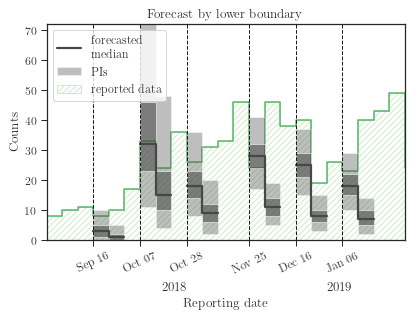

In [62]:
clr = sns.color_palette("Greys", 8)[6]
clr0_ = sns.color_palette("Greens", 8)[1]
clr1_ = sns.color_palette("Greens", 6)[3]
xtks = sw_to_forecast_and_to_plot.epicurve.values
xmin = min(xtks)-np.timedelta64(21,'D')
xmax = max(xtks)+np.timedelta64(28,'D')

fig, ax = plt.subplots()
fig.set_size_inches(6,4.75)
for idx, epicurve in enumerate(sw_to_forecast_and_to_plot.epicurve.values):
    dfp_forecast = out[out.epicurve==epicurve]
    dates_forecast = dfp_forecast.date.get_values()
    ax.step(dates_forecast,dfp_forecast['p50'],lw=2.2,where='post',color=clr,\
            label="_nolegend_" if idx else "forecasted\nmedian");
    ax.fill_between(dates_forecast,dfp_forecast['p2.5'],dfp_forecast['p97.5'],facecolor=clr, alpha=.35, step='post',\
            label="_nolegend_" if idx else "PIs")
    ax.fill_between(dates_forecast,dfp_forecast['p25'],dfp_forecast['p75'],facecolor=clr, alpha=.55, step='post',\
            label="_nolegend_" if idx else "_nolegend_")
    plt.axvline(x=dates_forecast[0],lw=1,color='k',linestyle='dashed',zorder=2)
    
# data
ax.step(dts_for_forecast_reported, confirmed_for_forecast_reported,lw=1.5,where='pre',
        label="_nolegend_",zorder=-1,color=clr1_)
ax.fill_between(dts_for_forecast_reported, confirmed_for_forecast_reported, edgecolor=clr0_, 
                facecolor='none', zorder=-1, hatch = '////', step='pre', 
                label='reported data')

# plot layout
ax.set_xticks(xtks)
ax.set_xlim(xmin,xmax)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_title("Forecast by lower boundary")
ax.set_xlabel("Reporting date")
ax.set_ylabel("Counts")
ax.set_ylim(0,72)
ax.legend(fontsize=12, loc=2)
fig.autofmt_xdate(rotation=25,ha='center')
ax.annotate('2019', (0,0), (280, -40), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=13)
ax.annotate('2018', (0,0), (115, -40), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=13)
ax.xaxis.labelpad = 20
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("../figures/draft/FigForecast-type0-npoints0-shift0.pdf",format='pdf',bbox_inches='tight')

# Forecasts construction with use of $R_{\text{eff}}$

In [63]:
@as_op(itypes=[tt.dscalar, tt.dscalar, tt.lscalar], otypes=[tt.dvector])
def get_probs_N_weeks(θ, k, n):
    τs = np.dtype('int64').type(np.arange(0,7*(n+1),7))
    res0 = 1-np.exp(-(τs/θ)**k)
    res0 = np.r_[np.diff(res0),1-res0[-1]]
    res = np.array(res0,dtype=np.float64)    
    return res

# illustrative example
θ__ = shared(np.dtype('float64').type(13.1))
k__ = shared(np.dtype('float64').type(1.5))
n__ = shared(np.dtype('int64').type(2))
res = get_probs_N_weeks(θ__,k__,n__).eval()

# first four columns are probabilities to get reported in forecasting window, 
# the last column is to get reported later
res

array([0.32335403, 0.34537005, 0.33127591])

In [64]:
@as_op(itypes=[tt.dvector, tt.lscalar, tt.lscalar, tt.lscalar], otypes=[tt.dscalar])
def get_interp_Reff(Y, approximation, shift, npoints):
    X = np.array(np.arange(np.max([-np.where(pd.notnull(Y))[0][0]-len(Y)+2,-(npoints+shift)]),-shift),dtype=np.int64)
    if approximation==4: 
        #cubic spline (similar to polynomial, not used in the manuscript)
        #npoints = total number of points - shift
        res = sp.interpolate.interp1d(X,[Y[x] for x in X], 
                                      fill_value='extrapolate', kind='cubic')(0).item()
    elif approximation==3:  
        #quadratic spline (similar to polynomial, not used in the manuscript)
        #npoints = total number of points - shift
        res = sp.interpolate.interp1d(X,[Y[x] for x in X], 
                                      fill_value='extrapolate', kind='quadratic')(0).item()
    elif approximation==2: 
        # (degree of polynomial = npoints-1) 
        # then by last point (npoints=1), linear (npoints=2), quadratic (npoints=3) and cubic (npoints=4)
        res = sp.polyval(sp.polyfit(X,[Y[x] for x in X],deg=npoints-1),0)
    elif approximation==1:
        # the mean of several Reff given by npoints
        res = np.mean([Y[x] for x in X])
    
    return np.array(res if res>0 else 0,dtype=np.float64)

In [65]:
def makeForecasting(df,df0,switchpoint,approximation,npoints,shift):
    if switchpoint<0: #no switchpoint
        with pm.Model() as model:
            # should be flat priors, where testval are initial conditions for optim-function
            delaymean = pm.Flat('delaymean', testval=12.)
            k = pm.Flat('k', shape=1, testval=1.5)
            logθ = tt.log(delaymean/tt.gamma(1+1/k))

            μ = df['confirmed'].values*\
                    (1-tt.exp(-tt.exp(k*(df['logδt0'].values-logθ))))/\
                    (1-tt.exp(-tt.exp(k*(df['logδt'].values-logθ))))
            pm.Poisson('likelihood', μ+0.001, observed=df['confirmed0'].values)

            vorder = [model[v.var] for v in model.bijection.ordering.vmap]
            solMLE = pm.find_MAP()
            hess = pm.find_hessian(solMLE,vars=vorder)
            cov =  np.linalg.inv(hess)

        with pm.Model() as model_sampling:
            pars = pm.MvNormal('pars', mu=model.dict_to_array(solMLE), cov=np.diagflat(np.diag(cov)), shape=2)
            logdelaymean = tt.log(pars[-1])
            k = pars[0]
            logθ = logdelaymean - tt.log(tt.gamma(1+1/k))

            ### Nowcasting
            delay0 = 1 - tt.exp(-tt.exp(k*(df0['logδt'].values-logθ)))
            μ = tt.switch((df0['confirmed'].values>0)&(delay0<1-0.001),df0['confirmed'].values*(1.0-delay0)/delay0,0.001)
            α = tt.switch((df0['confirmed'].values>0)&(delay0<1-0.001),df0['confirmed'].values/(1.0-delay0),0.001)
            unconfirmed = pm.NegativeBinomial('unconfirmed', mu = μ, alpha = α, shape = df0.shape[0])

            # total number of cases (confirmed unreported + confirmed reported + probable)
            reported = shared(df0['confirmed'].values)
            predicted = pm.Deterministic('predicted',unconfirmed+reported)

            ## forecasting
            dts = np.append(df0.date,df0.epicurve[:1])
            dts_t = np.append(df0.t,max(df0.t))
            dts = np.append(dts,dts_epicurves[pd.to_datetime(dts_epicurves)>snapshot][:forecasting_window])
            τs = np.array((snapshot-pd.to_datetime(dts)).astype('timedelta64[D]'),dtype='int64') 
            probs = pm.Deterministic('probs',probs_for_projection_no_switch(tt.exp(logθ),k,shared(τs)))
            forecasted_lower_boundary_all = pm.Multinomial('forecasted_lower_boundary_all', unconfirmed, probs+0.0001,\
                            shape=(df0.confirmed[df0.date<snapshot].get_values().shape[0],forecasting_window+1))
            forecasted_lower_boundary = forecasted_lower_boundary_all.sum(0)[:-1]

            ## implementation of Reff
            # generation time
            gtmean = shared(np.dtype('float64').type(15.3))
            gtsd = shared(np.dtype('float64').type(9.3))
            timestep = shared(np.dtype('float64').type(7.0))
            gt = pgamma(gtmean,gtsd,timestep,shared(np.dtype('int64').type(df0.shape[0]+forecasting_window)))
            # convolution with predicted
            Y = [0,predicted[1]/(predicted[0]*gt[0])]
            for idx in np.arange(1,df0.shape[0]-1):
                Y.append(predicted[idx+1]/tt.dot(predicted[idx::-1],gt[:(idx+1)]))
            Y = tt.stack(Y)
            # convolution with total
            Reff = pm.Deterministic('Reff',get_interp_Reff(Y, shared(approximation), shared(shift), shared(npoints)))

            λ_1st_week = Reff*tt.dot(predicted[(df0.shape[0]-1)::-1],gt[:df0.shape[0]]) 
            forecasted_1st_week_all = pm.Poisson('forecasted_1st_week_all', λ_1st_week+0.001)
            forecasted_1st_week_reported_all = pm.Multinomial('forecasted_1st_week_reported_all', 
                    forecasted_1st_week_all, get_probs_N_weeks(tt.exp(logθ),k,shared(np.dtype('int64').type(2))), shape=3)
            λ_2nd_week = Reff*(tt.dot(predicted[(df0.shape[0]-1)::-1],gt[1:(df0.shape[0]+1)])+forecasted_1st_week_all*gt[0]) 
            forecasted_2nd_week_all = pm.Poisson('forecasted_2nd_week', λ_2nd_week+0.001)
            forecasted_2nd_week_reported_all = pm.Multinomial('forecasted_2nd_week_reported_all',
                    forecasted_2nd_week_all, get_probs_N_weeks(tt.exp(logθ),k,shared(np.dtype('int64').type(1))), shape=2)
            forecast_1st_week = forecasted_lower_boundary[0]+forecasted_1st_week_reported_all[0] 
            forecast_2nd_week = forecasted_lower_boundary[1]+forecasted_1st_week_reported_all[1]+forecasted_2nd_week_reported_all[0]
            pm.Deterministic('forecast', tt.stack([forecast_1st_week,forecast_2nd_week]))
            
            sampling = pm.sample_prior_predictive(10000)
            
    else: #with a switchpoint
        with pm.Model() as model:
            # should be flat priors, where testval are initial conditions for optim-function
            delaymean = pm.Flat('delaymean', testval=14.)
            k = pm.Flat('k', shape=2, testval=[1.5]*2)
            logθ = tt.log(delaymean/tt.gamma(1+1/k))

            # implementing the switching point
            weight = tt.switch(df['t'].values>=switchpoint, 1, 0)
            logθ_ = (1-weight)*logθ[0] + weight*logθ[1]
            k_ = (1-weight)*k[0] + weight*k[1]

            μ = df['confirmed'].values*\
                    (1-tt.exp(-tt.exp(k_*(df['logδt0'].values-logθ_))))/\
                    (1-tt.exp(-tt.exp(k_*(df['logδt'].values-logθ_))))
            pm.Poisson('likelihood', μ+0.001, observed=df['confirmed0'].values)

            vorder = [model[v.var] for v in model.bijection.ordering.vmap]
            solMLE = pm.find_MAP()
            hess = pm.find_hessian(solMLE,vars=vorder)
            cov =  np.linalg.inv(hess)

        with pm.Model() as model_sampling:
            pars = pm.MvNormal('pars', mu=model.dict_to_array(solMLE), cov=np.diagflat(np.diag(cov)), shape=3)
            logdelaymean = tt.log(pars[-1])
            k = pars[:-1]
            logθ = logdelaymean - tt.log(tt.gamma(1+1/k))

            # implementing the switching point
            weight = tt.switch(df0['t'].values>=switchpoint, 1, 0)
            logθ_ = (1-weight)*logθ[0] + weight*logθ[1]
            k_ = (1-weight)*k[0] + weight*k[1]

            ### Nowcasting
            delay0 = 1 - tt.exp(-tt.exp(k_*(df0['logδt'].values-logθ_)))
            μ = tt.switch((df0['confirmed'].values>0)&(delay0<1-0.001),df0['confirmed'].values*(1.0-delay0)/delay0,0.001)
            α = tt.switch((df0['confirmed'].values>0)&(delay0<1-0.001),df0['confirmed'].values/(1.0-delay0),0.001)
            unconfirmed = pm.NegativeBinomial('unconfirmed', mu = μ, alpha = α, shape = df0.shape[0])

            # total number of cases (confirmed unreported + confirmed reported + probable)
            reported = shared(df0['confirmed'].values)
            predicted = pm.Deterministic('predicted',unconfirmed+reported)

            ## forecasting
            dts = np.append(df0.date,df0.epicurve[:1])
            dts_t = np.append(df0.t,max(df0.t))
            dts = np.append(dts,dts_epicurves[pd.to_datetime(dts_epicurves)>snapshot][:forecasting_window])
            τs = np.array((snapshot-pd.to_datetime(dts)).astype('timedelta64[D]'),dtype='int64') 
            w = tt.switch(dts_t>=switchpoint, 1, 0)
            logθ__ = (1-w)*logθ[0] + w*logθ[1]
            k__ = (1-w)*k[0] + w*k[1]
            probs = pm.Deterministic('probs',probs_for_projection(tt.exp(logθ__),k__,shared(τs)))
            forecasted_lower_boundary_all = pm.Multinomial('forecasted_lower_boundary_all', unconfirmed, probs+0.0001,\
                                        shape=(df0.confirmed[df0.date<snapshot].get_values().shape[0],forecasting_window+1))
            forecasted_lower_boundary = forecasted_lower_boundary_all.sum(0)[:-1]

            ## implementation of Reff
            # generation time
            gtmean = shared(np.dtype('float64').type(15.3))
            gtsd = shared(np.dtype('float64').type(9.3))
            timestep = shared(np.dtype('float64').type(7.0))
            gt = pgamma(gtmean,gtsd,timestep,shared(np.dtype('int64').type(df0.shape[0]+forecasting_window)))
            # convolution with predicted
            Y = [0,predicted[1]/(predicted[0]*gt[0])]
            for idx in np.arange(1,df0.shape[0]-1):
                Y.append(predicted[idx+1]/tt.dot(predicted[idx::-1],gt[:(idx+1)]))
            Y = tt.stack(Y)
            # convolution with total
            Reff = pm.Deterministic('Reff',get_interp_Reff(Y, shared(approximation), shared(shift), shared(npoints)))

            λ_1st_week = Reff*tt.dot(predicted[(df0.shape[0]-1)::-1],gt[:df0.shape[0]]) 
            forecasted_1st_week_all = pm.Poisson('forecasted_1st_week_all', λ_1st_week+0.001)
            forecasted_1st_week_reported_all = pm.Multinomial('forecasted_1st_week_reported_all', 
                    forecasted_1st_week_all, get_probs_N_weeks(tt.exp(logθ__[-1]),k__[-1],shared(np.dtype('int64').type(2))), shape=3)
            λ_2nd_week = Reff*(tt.dot(predicted[(df0.shape[0]-1)::-1],gt[1:(df0.shape[0]+1)])+forecasted_1st_week_all*gt[0]) 
            forecasted_2nd_week_all = pm.Poisson('forecasted_2nd_week', λ_2nd_week+0.001)
            forecasted_2nd_week_reported_all = pm.Multinomial('forecasted_2nd_week_reported_all',
                    forecasted_2nd_week_all, get_probs_N_weeks(tt.exp(logθ__[-1]),k__[-1],shared(np.dtype('int64').type(1))), shape=2)
            forecast_1st_week = forecasted_lower_boundary[0]+forecasted_1st_week_reported_all[0] 
            forecast_2nd_week = forecasted_lower_boundary[1]+forecasted_1st_week_reported_all[1]+forecasted_2nd_week_reported_all[0]
            pm.Deterministic('forecast', tt.stack([forecast_1st_week,forecast_2nd_week]))

            sampling = pm.sample_prior_predictive(10000)
            
    Df0 = df_forecast_reports.loc[pd.to_datetime(df_forecast_reports.date)>snapshot][:forecasting_window]
    pXX = ss.scoreatpercentile(sampling['forecast'],[2.5,50,97.5],axis=0)
    ## FluSight score
    x_ = sampling['forecast']-Df0['reported'].values
    x_ = (x_>=-log_score_threshold)&(x_<=log_score_threshold)
    log_scores = np.log(np.sum(x_,0)/len(sampling['forecast']))
    avr_scores = np.exp(log_scores)
    log_score = np.mean(log_scores)
    avr_score = np.exp(log_score)
    p50 = pXX[1]
    logp = sum(Df0['reported']*np.log(p50)-p50-[lgamma(x+1) for x in Df0['reported']])
    nparams = 4 if switchpoint>=0 else 2
    nsamplesize = len(Df0['reported'].values)
    AICc = 2*(nparams-logp)+2*(nparams**2+nparams)/(nsamplesize-nparams-1)
    AIC = 2*(nparams-logp)
    error_abs = p50-Df0['reported'].values
    error = np.log(p50/Df0['reported'].values)/np.log(10)
    coverage = ((Df0['reported']>=pXX[0])&(Df0['reported']<=pXX[-1]))
    df_stats = pd.DataFrame({'RMSE_abs': np.sqrt(np.mean(error_abs**2)),
                             'RMSE_rel': np.sqrt(np.mean(error**2)),
                             'avr_score__1': avr_scores[0],
                             'avr_score__2': avr_scores[1],
                             'log_score': log_score,
                             'avr_score': avr_score,
                             'logp': logp,
                             'AIC': AIC,
                             'AICc': AICc,
                             'bias': np.median(error),
                             'coverage__1': 'Yes' if coverage.iloc[0] else 'No',
                             'coverage__2': 'Yes' if coverage.iloc[-1] else 'No'},
                            index=[snapshot])
    display(df_stats)
    display(ss.scoreatpercentile(sampling['Reff'],[2.5,25,50,75,97.5],axis=0))

    dfp_forecast = ss.scoreatpercentile(sampling['forecast'],[2.5,25,50,75,97.5],axis=0)
    # next two lines are technical in order to show the additional step at the end
    dfp_forecast = np.c_[dfp_forecast,dfp_forecast[:,-1:]]
    dates_forecast = dts_epicurves[pd.to_datetime(dts_epicurves)>=snapshot][:(forecasting_window+1)]

    df_res = pd.DataFrame(dfp_forecast.T, index=dates_forecast, columns=['p2.5','p25','p50','p75','p97.5']).\
                reset_index().rename(columns={'index':'date'})
    df_res['epicurve'] = snapshot
    cols = df_res.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df_res = df_res[cols]

    return(df_res,df_stats,sampling['forecast'])

'Approximation: 1, npoints: 1, shift: 0'

,epicurve,date,p2.5,p25,p50,p75,p97.5
index,,,,,,,
0,2018-09-16,2018-09-16,0.0,2.0,4.0,7.0,14.0
1,2018-09-16,2018-09-23,0.0,2.0,4.0,7.0,16.0
2,2018-09-16,2018-09-30,0.0,2.0,4.0,7.0,16.0
0,2018-10-07,2018-10-07,15.0,32.0,45.0,64.0,125.0
1,2018-10-07,2018-10-14,35.0,82.0,135.0,232.0,673.0
2,2018-10-07,2018-10-21,35.0,82.0,135.0,232.0,673.0
0,2018-10-28,2018-10-28,10.0,18.0,24.0,31.0,49.0
1,2018-10-28,2018-11-04,12.0,24.0,34.0,47.0,87.0
2,2018-10-28,2018-11-11,12.0,24.0,34.0,47.0,87.0


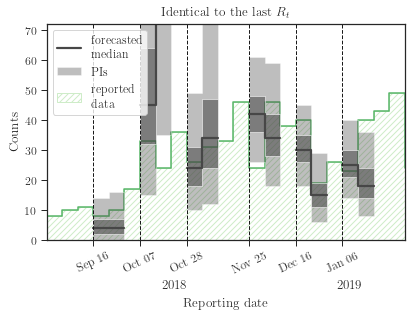

'Approximation: 1, npoints: 2, shift: 0'

,epicurve,date,p2.5,p25,p50,p75,p97.5
index,,,,,,,
0,2018-09-16,2018-09-16,1.0,3.0,5.0,7.0,13.0
1,2018-09-16,2018-09-23,1.0,3.0,5.0,8.0,15.0
2,2018-09-16,2018-09-30,1.0,3.0,5.0,8.0,15.0
0,2018-10-07,2018-10-07,15.0,29.0,41.0,57.0,110.0
1,2018-10-07,2018-10-14,30.0,60.0,92.0,143.0,382.0
2,2018-10-07,2018-10-21,30.0,60.0,92.0,143.0,382.0
0,2018-10-28,2018-10-28,12.0,21.0,26.0,33.0,49.0
1,2018-10-28,2018-11-04,23.0,36.0,44.0,55.0,84.0
2,2018-10-28,2018-11-11,23.0,36.0,44.0,55.0,84.0


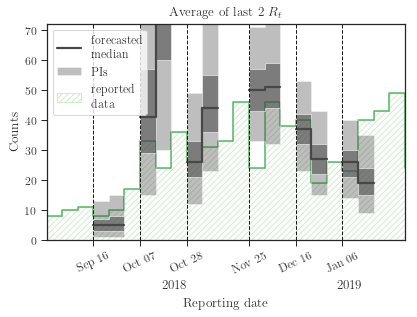

'Approximation: 1, npoints: 3, shift: 0'

,epicurve,date,p2.5,p25,p50,p75,p97.5
index,,,,,,,
0,2018-09-16,2018-09-16,1.0,3.0,5.0,7.0,13.000
1,2018-09-16,2018-09-23,1.0,4.0,6.0,8.0,14.000
2,2018-09-16,2018-09-30,1.0,4.0,6.0,8.0,14.000
0,2018-10-07,2018-10-07,14.0,28.0,39.0,54.0,101.000
1,2018-10-07,2018-10-14,26.0,51.0,73.0,112.0,275.000
2,2018-10-07,2018-10-21,26.0,51.0,73.0,112.0,275.000
0,2018-10-28,2018-10-28,12.0,20.0,25.0,31.0,46.000
1,2018-10-28,2018-11-04,21.0,32.0,39.0,48.0,70.000
2,2018-10-28,2018-11-11,21.0,32.0,39.0,48.0,70.000


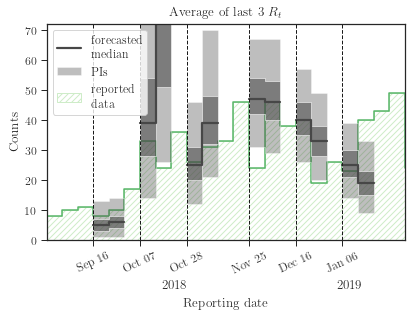

'Approximation: 1, npoints: 4, shift: 0'

,epicurve,date,p2.5,p25,p50,p75,p97.5
index,,,,,,,
0,2018-09-16,2018-09-16,1.0,3.0,5.0,7.0,12.025
1,2018-09-16,2018-09-23,1.0,3.0,5.0,7.0,13.000
2,2018-09-16,2018-09-30,1.0,3.0,5.0,7.0,13.000
0,2018-10-07,2018-10-07,14.0,27.0,37.0,53.0,97.000
1,2018-10-07,2018-10-14,22.0,42.0,63.0,94.0,221.025
2,2018-10-07,2018-10-21,22.0,42.0,63.0,94.0,221.025
0,2018-10-28,2018-10-28,14.0,22.0,27.0,33.0,48.000
1,2018-10-28,2018-11-04,28.0,40.0,47.0,56.0,78.000
2,2018-10-28,2018-11-11,28.0,40.0,47.0,56.0,78.000


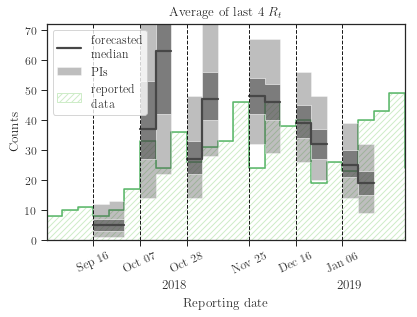

'Approximation: 2, npoints: 1, shift: 0'

,epicurve,date,p2.5,p25,p50,p75,p97.5
index,,,,,,,
0,2018-09-16,2018-09-16,0.0,2.0,4.0,7.0,13.0
1,2018-09-16,2018-09-23,0.0,2.0,4.0,7.0,16.0
2,2018-09-16,2018-09-30,0.0,2.0,4.0,7.0,16.0
0,2018-10-07,2018-10-07,15.0,32.0,46.0,65.0,127.0
1,2018-10-07,2018-10-14,34.0,83.0,139.0,236.0,708.0
2,2018-10-07,2018-10-21,34.0,83.0,139.0,236.0,708.0
0,2018-10-28,2018-10-28,10.0,18.0,24.0,31.0,49.0
1,2018-10-28,2018-11-04,12.0,24.0,34.0,47.0,87.0
2,2018-10-28,2018-11-11,12.0,24.0,34.0,47.0,87.0


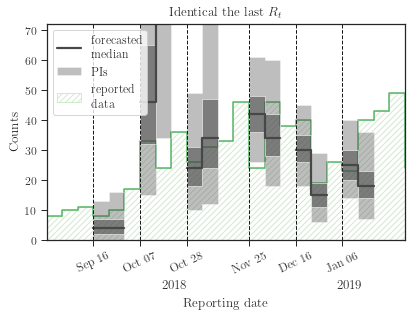

'Approximation: 2, npoints: 2, shift: 0'

,epicurve,date,p2.5,p25,p50,p75,p97.5
index,,,,,,,
0,2018-09-16,2018-09-16,0.0,2.0,3.0,6.0,14.000
1,2018-09-16,2018-09-23,0.0,1.0,2.0,5.0,20.000
2,2018-09-16,2018-09-30,0.0,1.0,2.0,5.0,20.000
0,2018-10-07,2018-10-07,17.0,37.0,54.0,79.0,159.000
1,2018-10-07,2018-10-14,42.0,132.0,238.0,432.0,1388.075
2,2018-10-07,2018-10-21,42.0,132.0,238.0,432.0,1388.075
0,2018-10-28,2018-10-28,8.0,15.0,20.0,28.0,49.000
1,2018-10-28,2018-11-04,3.0,7.0,15.0,33.0,95.000
2,2018-10-28,2018-11-11,3.0,7.0,15.0,33.0,95.000


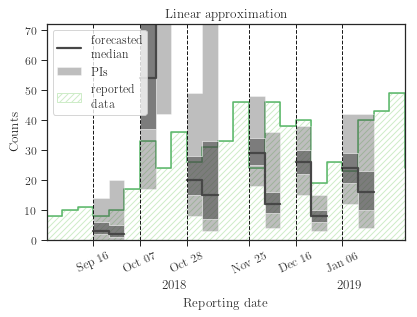

'Approximation: 2, npoints: 3, shift: 0'

,epicurve,date,p2.5,p25,p50,p75,p97.5
index,,,,,,,
0,2018-09-16,2018-09-16,0.0,1.0,3.0,6.0,15.0
1,2018-09-16,2018-09-23,0.0,1.0,2.0,4.0,23.0
2,2018-09-16,2018-09-30,0.0,1.0,2.0,4.0,23.0
0,2018-10-07,2018-10-07,17.0,42.0,63.0,93.0,193.0
1,2018-10-07,2018-10-14,46.0,180.0,349.0,667.0,2309.0
2,2018-10-07,2018-10-21,46.0,180.0,349.0,667.0,2309.0
0,2018-10-28,2018-10-28,8.0,14.0,18.0,24.0,46.0
1,2018-10-28,2018-11-04,3.0,6.0,9.0,13.0,76.0
2,2018-10-28,2018-11-11,3.0,6.0,9.0,13.0,76.0


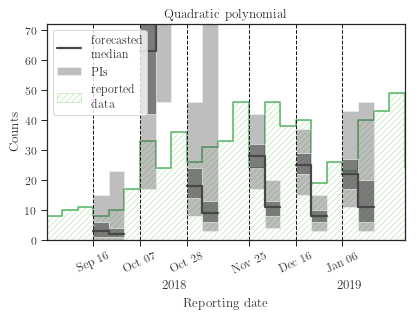

'Approximation: 2, npoints: 4, shift: 0'

,epicurve,date,p2.5,p25,p50,p75,p97.5
index,,,,,,,
0,2018-09-16,2018-09-16,0.0,2.0,4.0,6.0,17.000
1,2018-09-16,2018-09-23,0.0,1.0,2.0,6.0,30.000
2,2018-09-16,2018-09-30,0.0,1.0,2.0,6.0,30.000
0,2018-10-07,2018-10-07,18.0,47.0,71.0,106.0,227.025
1,2018-10-07,2018-10-14,49.0,232.0,462.0,887.0,3343.100
2,2018-10-07,2018-10-21,49.0,232.0,462.0,887.0,3343.100
0,2018-10-28,2018-10-28,8.0,14.0,19.0,24.0,36.000
1,2018-10-28,2018-11-04,3.0,6.0,9.0,13.0,21.000
2,2018-10-28,2018-11-11,3.0,6.0,9.0,13.0,21.000


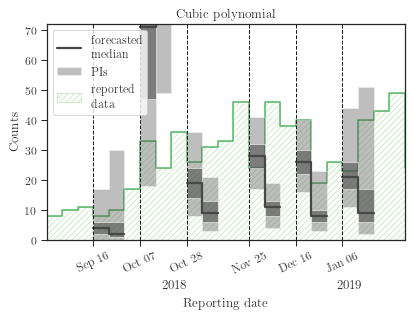

CPU times: user 3.83 s, sys: 136 ms, total: 3.96 s
Wall time: 5.04 s


In [66]:
%%time
%%capture --no-display
clr = sns.color_palette("Greys", 8)[6]
clr0_ = sns.color_palette("Greens", 8)[1]
clr1_ = sns.color_palette("Greens", 6)[3]
xtks = sw_to_forecast_and_to_plot.epicurve.values
xmin = min(xtks)-np.timedelta64(21,'D')
xmax = max(xtks)+np.timedelta64(28,'D')

recalc=False
for approximation in [1,2]:
    for npoints in [1,2,3,4]:
        for shift in [0]:
            display("Approximation: %s, npoints: %d, shift: %d"%(approximation,npoints,shift))
            if (recalc):
                display("No switch in delay function")
                out = None; out_stats = None
                for idx in sw_to_forecast_and_to_plot.index:
                    snapshot = sw_to_forecast_and_to_plot.loc[idx,'epicurve']
                    display(snapshot)
                    df, df0 = make_df_and_df0(Df, snapshot)
                    first_nonzero_count = df.iloc[df.confirmed0.to_numpy().nonzero()[0]].date.min()
                    res, res_stats, trace = makeForecasting(df,df0,-1,
                                                            approximation,npoints,shift)
                    display(res)
                    with open('../results/traces/trace_noswitch-type%d-npoints%d-shift%d-%s.pkl'%(approximation,npoints,shift,snapshot.strftime(format="%Y-%m-%d")), 'wb') as buff:
                        pickle.dump(trace, buff)

                    out = pd.concat([out, res])
                    out_stats = pd.concat([out_stats,res_stats])        

                out = out.sort_values(['epicurve','date'])
                display(out)

                out.to_csv("../results/forecast_noswitch-type%d-npoints%d-shift%d.csv"%(approximation,npoints,shift))
                out_stats.to_csv("../results/forecast_noswitch-type%d-npoints%d-shift%d-stats.csv"%(approximation,npoints,shift))

                display("One switch in delay function")
                out = None; out_stats = None
                for idx in sw_to_forecast_and_to_plot.index:
                    snapshot = sw_to_forecast_and_to_plot.loc[idx,'epicurve']
                    display(snapshot)
                    df, df0 = make_df_and_df0(Df, snapshot)
                    first_nonzero_count = df.iloc[df.confirmed0.to_numpy().nonzero()[0]].date.min()
                    res, res_stats, trace = makeForecasting(df,df0,sw_to_forecast_and_to_plot.loc[idx,'switch_t'],
                                                            approximation,npoints,shift)
                    display(res)
                    with open('../results/traces/trace-type%d-npoints%d-shift%d-%s.pkl'%(approximation,npoints,shift,snapshot.strftime(format="%Y-%m-%d")), 'wb') as buff:
                        pickle.dump(trace, buff)

                    out = pd.concat([out, res])
                    out_stats = pd.concat([out_stats,res_stats])        

                out = out.sort_values(['epicurve','date'])
                display(out)

                out.to_csv("../results/forecast-type%d-npoints%d-shift%d.csv"%(approximation,npoints,shift))
                out_stats.to_csv("../results/forecast-type%d-npoints%d-shift%d-stats.csv"%(approximation,npoints,shift))

            else:
                out = pd.read_csv("../results/forecast-type%d-npoints%d-shift%d.csv"%(approximation,npoints,shift)).rename(columns={'Unnamed: 0': 'index'}).set_index('index')
                out['epicurve'] = pd.to_datetime(out['epicurve'],format="%Y-%m-%d")
                out['date'] = pd.to_datetime(out['date'],format="%Y-%m-%d") 
                display(out)

            fig, ax = plt.subplots()
            fig.set_size_inches(6,4.75)
            for idx, epicurve in enumerate(sw_to_forecast_and_to_plot.epicurve.values):
                dfp_forecast = out[out.epicurve==epicurve]
                dates_forecast = dfp_forecast.date.get_values()
                ax.step(dates_forecast,dfp_forecast['p50'],lw=2.2,where='post',color=clr,\
                        label="_nolegend_" if idx else "forecasted\nmedian");
                ax.fill_between(dates_forecast,dfp_forecast['p2.5'],dfp_forecast['p97.5'],facecolor=clr, alpha=.35, step='post',\
                        label="_nolegend_" if idx else "PIs")
                ax.fill_between(dates_forecast,dfp_forecast['p25'],dfp_forecast['p75'],facecolor=clr, alpha=.55, step='post',\
                        label="_nolegend_" if idx else "_nolegend_")
                plt.axvline(x=dates_forecast[0],lw=1,color='k',linestyle='dashed',zorder=2)

            # data
            ax.step(dts_for_forecast_reported, confirmed_for_forecast_reported, 
                    lw=1.5,where='pre',label="_nolegend_",zorder=-1,color=clr1_)
            ax.fill_between(dts_for_forecast_reported, confirmed_for_forecast_reported, 
                            edgecolor=clr0_, facecolor='none', zorder=-1, hatch = '////', step='pre', 
                            label='reported\ndata')

            # plot layout
            ax.set_xticks(xtks)
            ax.set_xlim(xmin,xmax)
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
            if approximation==1:
                if npoints==1:
                    ttl = r"Identical to the last $R_t$"
                elif npoints>=2:
                    ttl = r"Average of last %d $R_{t}$"%npoints
            elif approximation==2:
                if npoints==1:
                    ttl = r"Identical the last $R_{t}$"
                elif npoints==2:
                    ttl = "Linear approximation"
                elif npoints==3:
                    ttl = "Quadratic polynomial"
                elif npoints==4:
                    ttl = "Cubic polynomial"
            if shift>0:
                ttl = ttl+'  (\# last points to ignore: %d)'%shift
            ax.set_title(ttl)
            ax.set_xlabel("Reporting date")
            ax.set_ylabel("Counts")
            ax.set_ylim(0,72)
            ax.legend(fontsize=12, loc=2)
            fig.autofmt_xdate(rotation=25,ha='center')
            ax.annotate('2019', (0,0), (290, -38), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=13)
            ax.annotate('2018', (0,0), (115, -38), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=13)
            ax.xaxis.labelpad = 20
            plt.tight_layout(rect=[0, 0, 1, 0.97])
            plt.savefig("../figures/draft/FigForecast-type%d-npoints%d-shift%d.pdf"%(approximation,npoints,shift),format='pdf',bbox_inches='tight')
            plt.show()